## 2. EXPLORATORY DATA ANALYSIS

Previously, we have cleaned our datasets to create several subdatasets. The 2 main ones are about waste generation (one for cities and teh other one for countries). We are now going to work with these 2 files to understand the factors that influenciate our target variable : waste generation and with the aim to be able to predict/model it in the project next step.

During cleaning of the datasets, we also generated datasets with information about recycling, waste composition, compost and other special wastes. We will keed this mind, it will certainly help to clarify some points.

In [1]:
#we call the required functions for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import dexplot as dxp
import pandas_datareader as dr
plt.style.use('seaborn-darkgrid')
import plotly.graph_objects as go
import plotly.express as px

from MC_FP_UsefulFunctions import *

In [2]:
#files location:
os.chdir(r'/Users/marike/Documents/MARIKE/DATA SCIENCE/Final project/Marike FP/Data')

"""indicate in below code line (convert comment to code) the location of Speed Dating Data 
in case of checking the project from another computer"""
# os.chdir("..")

'indicate in below code line (convert comment to code) the location of Speed Dating Data \nin case of checking the project from another computer'

## 2.1 EDA of cities dataset

In [3]:
waste_generation_cities_path = r'CitiesWasteGeneration.csv'
waste_cities_df = pd.read_csv(waste_generation_cities_path)

In [4]:
waste_cities_df.head()

country_code region_id  income_id       city_name IF_SW_mgmt_dept  \
0          AFG       SAS  LowIncome       Jalalabad             yes   
1          AFG       SAS  LowIncome        Kandahar             yes   
2          AFG       SAS  LowIncome  Mazar-E-Sharif             yes   
3          AFG       SAS  LowIncome           Kabul              no   
4          AFG       SAS  LowIncome         HiratÂ              yes   

  IF_SW_mgmt_info IF_SW_control_enforcing_unit  \
0              no                           no   
1              no                           no   
2              no                           no   
3              no                           no   
4              no                           no   

  LF_long_term_integrated_SW_master_plan LF_SW_master_plan_being_implemented  \
0                                     no                                  no   
1                                     no                                  no   
2                                     no                                  no   
3                                     no                                  no   
4                                     no                                  no   

  LF_SW_mgmt_rules_and_regulations  ...     primary_collection_form  \
0                              yes  ...                door to door   
1                              yes  ...  centralized drop-off point   
2                              yes  ...  centralized drop-off point   
3                              yes  ...  centralized drop-off point   
4                              yes  ...                door to door   

  separation_metals separation_glass separation_organic  \
0                no               no                 no   
1                no               no                 no   
2                no               no                 no   
3                no               no                 no   
4                no               no                 no   

  separation_paper_cardboard separation_plastics_packaging  \
0                         no                            no   
1                         no                            no   
2                         no                            no   
3                         no                            no   
4                         no                            no   

  separation_existence MSW_generated_tons_year  \
0                   no                58914.45   
1                   no               120971.00   
2                   no                52368.40   
3                   no              1989250.00   
4                   no                91644.70   

   waste_collection_coverage_percent  recycling_percent  
0                                0.0                0.0  
1                                0.0                0.0  
2                                0.0                0.0  
3                               75.0                0.0  
4                                0.0                0.0  

[5 rows x 21 columns]

In [5]:
waste_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 21 columns):
country_code                              326 non-null object
region_id                                 326 non-null object
income_id                                 326 non-null object
city_name                                 326 non-null object
IF_SW_mgmt_dept                           326 non-null object
IF_SW_mgmt_info                           326 non-null object
IF_SW_control_enforcing_unit              326 non-null object
LF_long_term_integrated_SW_master_plan    326 non-null object
LF_SW_master_plan_being_implemented       326 non-null object
LF_SW_mgmt_rules_and_regulations          326 non-null object
population                                326 non-null float64
primary_collection_form                   326 non-null object
separation_metals                         326 non-null object
separation_glass                          326 non-null object
separation_organic        

In [6]:
len(waste_cities_df.city_name.unique())

326

In [7]:
len(waste_cities_df.country_code.unique())

150

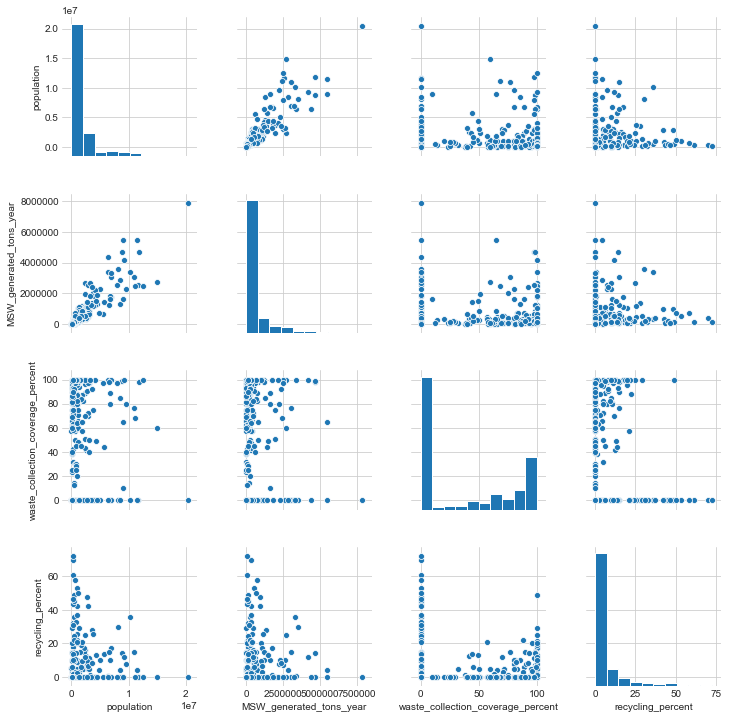

In [8]:
sns.set_style("whitegrid")
sns.pairplot(waste_cities_df)

In [9]:
cities_region = waste_cities_df[['city_name','region_id']].groupby('region_id').count()
cities_region=cities_region.rename(columns={'city_name':'num_cities'})
cities_region['percent']=round(cities_region['num_cities']*100/cities_region['num_cities'].sum(),2)
cities_region

num_cities  percent
region_id                     
EAS                35    10.74
ECS                74    22.70
LCN                39    11.96
MEA                24     7.36
NAC                 6     1.84
SAS                83    25.46
SSF                65    19.94

In [10]:
cities_country = waste_cities_df[['city_name','country_code']].groupby('country_code').count()
cities_country=cities_country.rename(columns={'city_name':'num_cities'})
cities_country['percent']=round(cities_country['num_cities']*100/cities_country['num_cities'].sum(),2)
cities_country=cities_country.sort_values(by='percent', ascending=False)

Text(0.5, 1.0, 'Cities distribution by region')

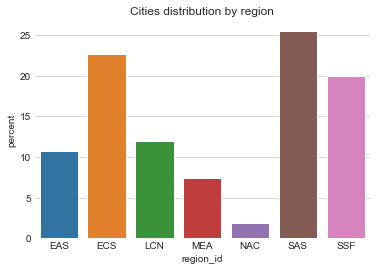

In [11]:
sns.barplot(x=cities_region.index, y="percent", data=cities_region).set_title('Cities distribution by region')

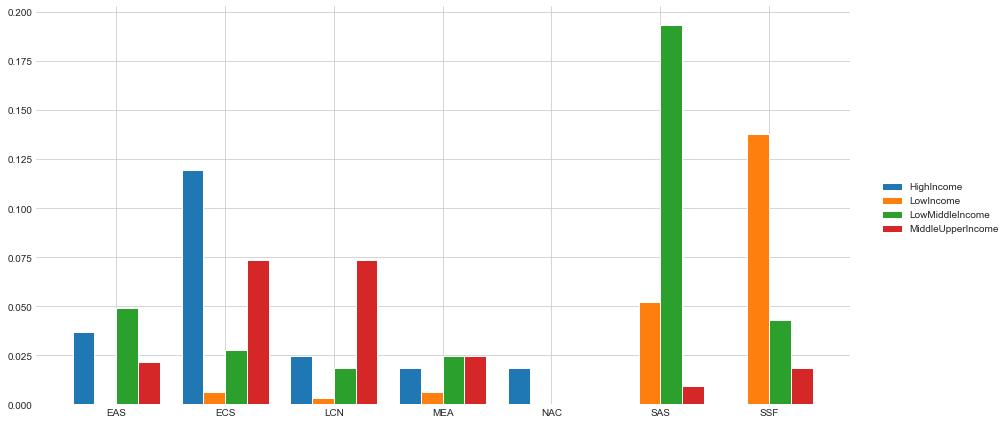

In [12]:
dxp.aggplot(agg='region_id', data=waste_cities_df, normalize='all', hue='income_id')

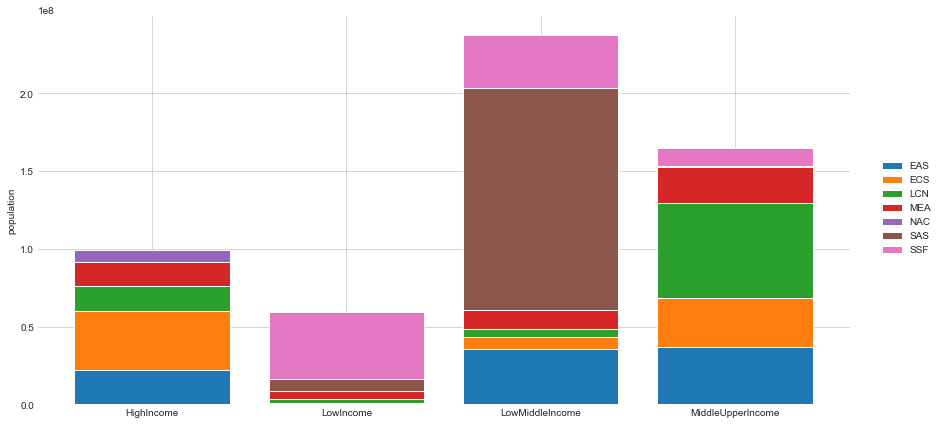

In [13]:
dxp.aggplot(agg='population', data=waste_cities_df, hue='region_id', groupby='income_id', aggfunc='sum', stacked=True)

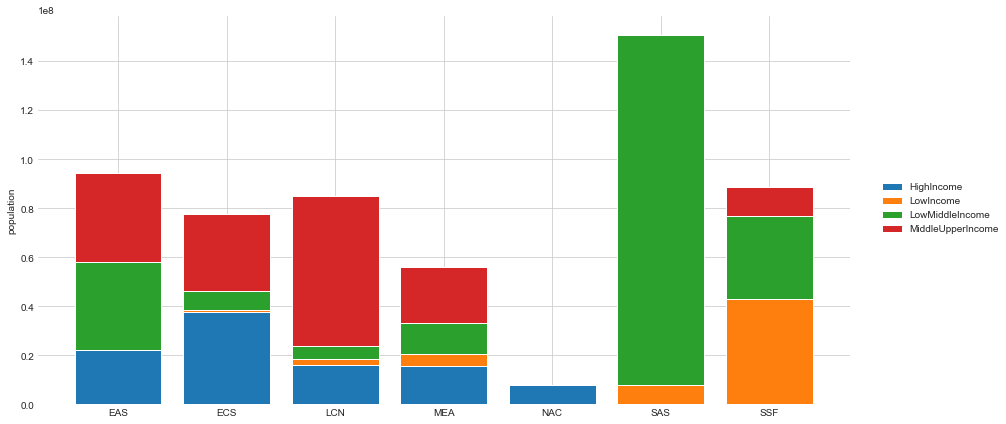

In [14]:
dxp.aggplot(agg='population', data=waste_cities_df, hue='income_id', groupby='region_id', aggfunc='sum', stacked=True)

Text(0.5, 1.0, '15 countries with more cities represented')

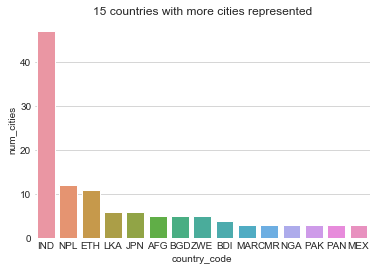

In [15]:
sns.barplot(x=cities_country.head(15).index, y="num_cities", data=cities_country.sort_values(by='percent', ascending=False).head(15)).set_title('15 countries with more cities represented')

In [16]:
cities_income = waste_cities_df[['city_name','income_id']].groupby('income_id').count()
cities_income=cities_income.rename(columns={'city_name':'num_cities'})
cities_income['percent']=round(cities_income['num_cities']*100/cities_income['num_cities'].sum(),2)

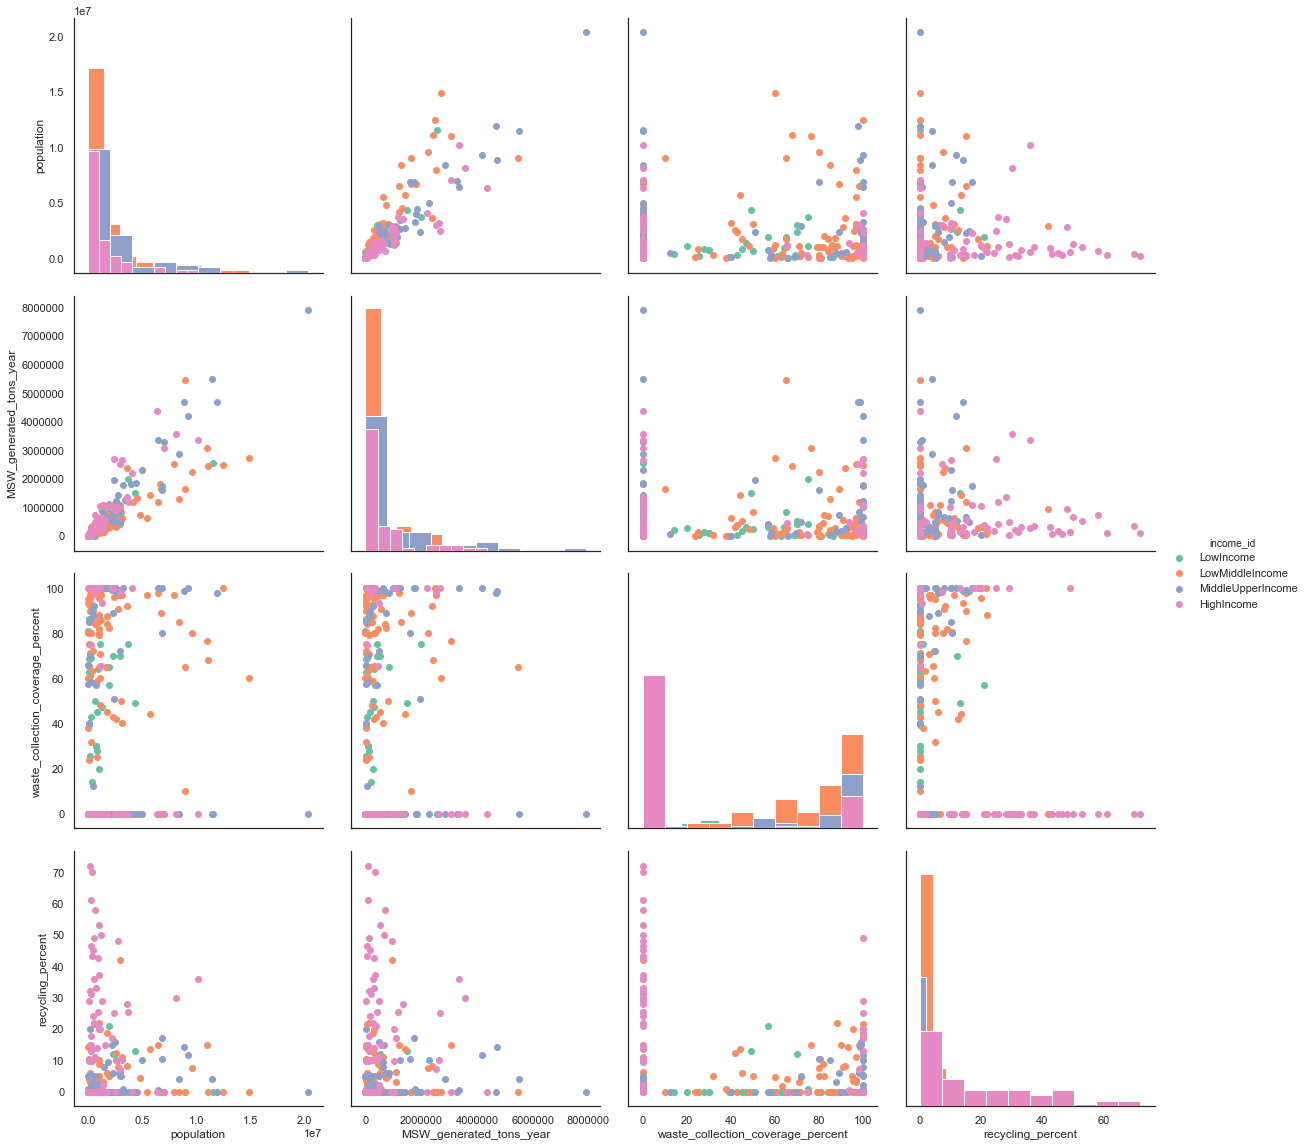

In [17]:
sns.set(style="white", palette="Set2")

g = sns.PairGrid(waste_cities_df, hue="income_id", height=4)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [18]:
waste_cities_df.describe()

population  MSW_generated_tons_year  \
count  3.260000e+02             3.260000e+02   
mean   1.719920e+06             5.830133e+05   
std    2.708494e+06             1.004925e+06   
min    7.500000e+03             8.723500e+02   
25%    2.100000e+05             5.392875e+04   
50%    7.125000e+05             2.177520e+05   
75%    1.928500e+06             5.454375e+05   
max    2.038400e+07             7.903000e+06   

       waste_collection_coverage_percent  recycling_percent  
count                         326.000000         326.000000  
mean                           37.334448           5.942546  
std                            42.106348          12.275638  
min                             0.000000           0.000000  
25%                             0.000000           0.000000  
50%                             0.000000           0.000000  
75%                            84.000000           5.985000  
max                           100.000000          72.000000

In [19]:
waste_cities_df[['recycling_percent']].loc[(waste_cities_df.waste_collection_coverage_percent==0) &(waste_cities_df.income_id=='HighIncome')]

recycling_percent
15              70.000
16               0.000
22               0.000
23              53.000
46              47.910
47              42.500
48               0.000
49              43.220
50               0.000
64               9.890
65               0.000
66               0.000
67              28.000
69               0.000
75              32.000
76              10.000
77               0.000
94              30.000
95              45.030
100              0.000
101              0.000
107              0.000
108              0.000
110              0.000
162             72.000
163             49.900
165             25.543
166             14.890
167              9.670
168             15.010
169             25.380
170             24.280
177             36.000
189             36.000
191              0.000
214              0.000
226             14.000
227             46.400
228             37.197
241              0.000
242             10.000
243              0.000
247              2.000
253              0.000
255              0.000
256             33.000
257             21.800
258              0.000
270              0.000
279              9.790
280              9.810
281             61.000
283             21.000
304             29.000
305             58.040
306             11.000
307             31.000

Waste_collection_coverage_percent variable is equal to 0 for cities with high income and recycling rate, this is incoherent.

During the cleaning, percentage was defined as null when the value was missing but it appears that in some cases it was not informed but should certainly have been considered as equal to 100%. Since we cannot define for which cases it should be considered null or at the opposite equal to 100%, we decide to drop this variable because its information cannot be trusted.

In [20]:
waste_cities_df = waste_cities_df.drop(['waste_collection_coverage_percent'],axis=1)
waste_cities_df

country_code region_id  income_id       city_name IF_SW_mgmt_dept  \
0            AFG       SAS  LowIncome       Jalalabad             yes   
1            AFG       SAS  LowIncome        Kandahar             yes   
2            AFG       SAS  LowIncome  Mazar-E-Sharif             yes   
3            AFG       SAS  LowIncome           Kabul              no   
4            AFG       SAS  LowIncome         HiratÂ              yes   
..           ...       ...        ...             ...             ...   
321          ZWE       SSF  LowIncome          Norton              no   
322          ZWE       SSF  LowIncome        Chinhoyi              no   
323          ZWE       SSF  LowIncome        HarareÂ              yes   
324          ZWE       SSF  LowIncome           Gweru              no   
325          ZWE       SSF  LowIncome          Kariba              no   

    IF_SW_mgmt_info IF_SW_control_enforcing_unit  \
0                no                           no   
1                no                           no   
2                no                           no   
3                no                           no   
4                no                           no   
..              ...                          ...   
321              no                           no   
322              no                           no   
323              no                           no   
324              no                           no   
325              no                           no   

    LF_long_term_integrated_SW_master_plan  \
0                                       no   
1                                       no   
2                                       no   
3                                       no   
4                                       no   
..                                     ...   
321                                     no   
322                                     no   
323                                     no   
324                                     no   
325                                     no   

    LF_SW_master_plan_being_implemented LF_SW_mgmt_rules_and_regulations  \
0                                    no                              yes   
1                                    no                              yes   
2                                    no                              yes   
3                                    no                              yes   
4                                    no                              yes   
..                                  ...                              ...   
321                                  no                               no   
322                                  no                               no   
323                                  no                               no   
324                                  no                               no   
325                                  no                               no   

     population     primary_collection_form separation_metals  \
0      326585.0                door to door                no   
1      429000.0  centralized drop-off point                no   
2      635250.0  centralized drop-off point                no   
3     3700000.0  centralized drop-off point                no   
4      337000.0                door to door                no   
..          ...                         ...               ...   
321     58421.0                not_informed                no   
322     98000.0                not_informed                no   
323   1379000.0                door to door                no   
324    157865.0                not_informed                no   
325     26512.0                not_informed                no   

    separation_glass separation_organic separation_paper_cardboard  \
0                 no                 no                         no   
1                 no                 no                         no   
2                 no                 no      

In [21]:
waste_cities_df['Waste_by_city_inhabitant_kg_year']=round(waste_cities_df['MSW_generated_tons_year']*1000/waste_cities_df['population'],2)

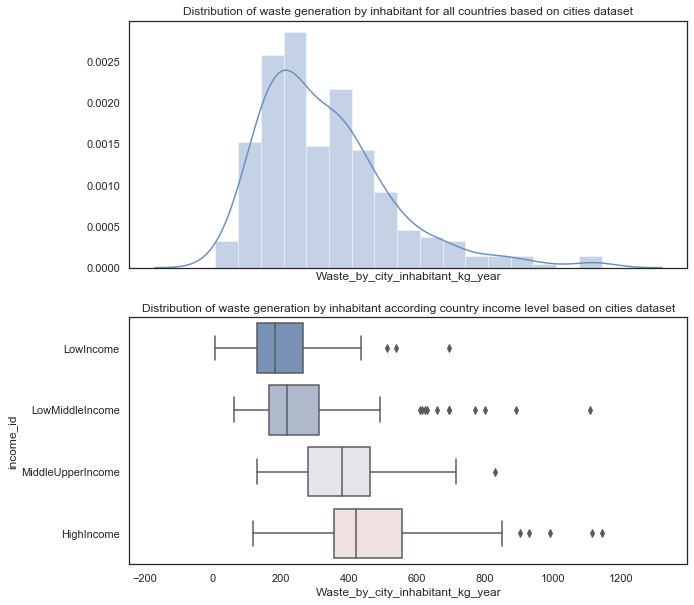

In [22]:
sns.set(style="white", palette="vlag", color_codes=True)

fig, axes = plt.subplots(nrows=2,figsize=(10, 10), sharex=True)

"""Then you can plot each columns in a different subplot with the ax argument, 
using ax=axes[nrow,ncol] to specify the subplot you want to print in:"""
sns.distplot(waste_cities_df.Waste_by_city_inhabitant_kg_year,ax=axes[0]).set_title(('Distribution of waste generation by inhabitant for all countries based on cities dataset'))
sns.boxplot(data=waste_cities_df,x="Waste_by_city_inhabitant_kg_year", y="income_id",ax=axes[1]).set_title(('Distribution of waste generation by inhabitant according country income level based on cities dataset'))

fig.savefig("plots_waste_inhab_distr_CDS.png", bbox_inches="tight") 


In [23]:
Cities_by_higher_waste_generation = waste_cities_df[['city_name','country_code','region_id','income_id','Waste_by_city_inhabitant_kg_year']].sort_values(by=['Waste_by_city_inhabitant_kg_year'], ascending=False)
Cities_by_higher_waste_generation=Cities_by_higher_waste_generation.reset_index(drop=True)
Cities_by_higher_waste_generation.replace('df.replace(0, 5)')

city_name country_code region_id        income_id  \
0       Seattle          USA       NAC       HighIncome   
1         Dubai          ARE       MEA       HighIncome   
2           Osh          KGZ       ECS  LowMiddleIncome   
3      Canberra          AUS       EAS       HighIncome   
4        Trnava          SVK       ECS       HighIncome   
..          ...          ...       ...              ...   
321     Weldiya          ETH       SSF        LowIncome   
322  Badimalika          NPL       SAS        LowIncome   
323  Bhimeshwor          NPL       SAS        LowIncome   
324     Muyinga          BDI       SSF        LowIncome   
325     Kayanza          BDI       SSF        LowIncome   

     Waste_by_city_inhabitant_kg_year  
0                             1141.85  
1                             1113.79  
2                             1109.26  
3                              989.75  
4                              927.98  
..                                ...  
321                             55.46  
322                             47.91  
323                             44.42  
324                              8.95  
325                              6.86  

[326 rows x 5 columns]

In [24]:
cities_fifteen_higher_lower_waste_generation = pd.concat([Cities_by_higher_waste_generation.head(15),Cities_by_higher_waste_generation.tail(15)])
cities_fifteen_higher_lower_waste_generation.replace('Ciudada AutÃ³noma De Buenos Aires (Caba).','Buenos Aires',inplace=True)
cities_fifteen_higher_lower_waste_generation

city_name country_code region_id          income_id  \
0           Seattle          USA       NAC         HighIncome   
1             Dubai          ARE       MEA         HighIncome   
2               Osh          KGZ       ECS    LowMiddleIncome   
3          Canberra          AUS       EAS         HighIncome   
4            Trnava          SVK       ECS         HighIncome   
5         Abu Dhabi          ARE       MEA         HighIncome   
6           Colombo          LKA       SAS    LowMiddleIncome   
7      Buenos Aires          ARG       LCN         HighIncome   
8            Madrid          ESP       ECS         HighIncome   
9              Baku          AZE       ECS  MiddleUpperIncome   
10      Ulaanbaatar          MNG       EAS    LowMiddleIncome   
11       Wellington          NZL       EAS         HighIncome   
12        Pavlograd          UKR       ECS    LowMiddleIncome   
13         Pamplona          ESP       ECS         HighIncome   
14        San Pedro          BLZ       LCN  MiddleUpperIncome   
311        Srinagar          IND       SAS    LowMiddleIncome   
312        Rajshahi          BGD       SAS    LowMiddleIncome   
313         Rangpur          BGD       SAS    LowMiddleIncome   
314     Debre Tabor          ETH       SSF          LowIncome   
315  Mazar-E-Sharif          AFG       SAS          LowIncome   
316          Butwal          NPL       SAS          LowIncome   
317      Patuakhali          BGD       SAS    LowMiddleIncome   
318      Dembi Dolo          ETH       SSF          LowIncome   
319            Bati          ETH       SSF          LowIncome   
320             Oyo          NGA       SSF    LowMiddleIncome   
321         Weldiya          ETH       SSF          LowIncome   
322      Badimalika          NPL       SAS          LowIncome   
323      Bhimeshwor          NPL       SAS          LowIncome   
324         Muyinga          BDI       SSF          LowIncome   
325         Kayanza          BDI       SSF          LowIncome   

     Waste_by_city_inhabitant_kg_year  
0                             1141.85  
1                             1113.79  
2                             1109.26  
3                              989.75  
4                              927.98  
5                              902.66  
6                              889.41  
7                              849.16  
8                              838.00  
9                              828.11  
10                             798.84  
11                             789.82  
12                             769.90  
13                             722.19  
14                             715.16  
311                             92.71  
312                             89.42  
313                             88.33  
314                             83.48  
315                             82.44  
316                             81.85  
317                             80.31  
318                             80.31  
319                             71.53  
320                             62.11  
321                             55.46  
322                             47.91  
323                             44.42  
324                              8.95  
325                              6.86

In [25]:
import world_bank_data as wb
wbcountries = wb.get_countries()
wbcountries=wbcountries.reset_index()
wbcountries.head()

id iso2Code         name                      region  \
0  ABW       AW        Aruba  Latin America & Caribbean    
1  AFG       AF  Afghanistan                  South Asia   
2  AFR       A9       Africa                  Aggregates   
3  AGO       AO       Angola         Sub-Saharan Africa    
4  ALB       AL      Albania       Europe & Central Asia   

                                     adminregion          incomeLevel  \
0                                                         High income   
1                                     South Asia           Low income   
2                                                          Aggregates   
3     Sub-Saharan Africa (excluding high income)  Lower middle income   
4  Europe & Central Asia (excluding high income)  Upper middle income   

      lendingType capitalCity  longitude  latitude  
0  Not classified  Oranjestad   -70.0167  12.51670  
1             IDA       Kabul    69.1761  34.52280  
2      Aggregates                    NaN       NaN  
3            IBRD      Luanda    13.2420  -8.81155  
4            IBRD      Tirane    19.8172  41.33170

In [26]:
wbcountries = wbcountries.rename(columns={'id':'country_code'})
wbcountries

country_code iso2Code                                               name  \
0            ABW       AW                                              Aruba   
1            AFG       AF                                        Afghanistan   
2            AFR       A9                                             Africa   
3            AGO       AO                                             Angola   
4            ALB       AL                                            Albania   
..           ...      ...                                                ...   
299          XZN       A5  Sub-Saharan Africa excluding South Africa and ...   
300          YEM       YE                                        Yemen, Rep.   
301          ZAF       ZA                                       South Africa   
302          ZMB       ZM                                             Zambia   
303          ZWE       ZW                                           Zimbabwe   

                         region  \
0    Latin America & Caribbean    
1                    South Asia   
2                    Aggregates   
3           Sub-Saharan Africa    
4         Europe & Central Asia   
..                          ...   
299                  Aggregates   
300  Middle East & North Africa   
301         Sub-Saharan Africa    
302         Sub-Saharan Africa    
303         Sub-Saharan Africa    

                                           adminregion          incomeLevel  \
0                                                               High income   
1                                           South Asia           Low income   
2                                                                Aggregates   
3           Sub-Saharan Africa (excluding high income)  Lower middle income   
4        Europe & Central Asia (excluding high income)  Upper middle income   
..                                                 ...                  ...   
299                                                              Aggregates   
300  Middle East & North Africa (excluding high inc...           Low income   
301         Sub-Saharan Africa (excluding high income)  Upper middle income   
302         Sub-Saharan Africa (excluding high income)  Lower middle income   
303         Sub-Saharan Africa (excluding high income)  Lower middle income   

        lendingType capitalCity  longitude  latitude  
0    Not classified  Oranjestad   -70.0167  12.51670  
1               IDA       Kabul    69.1761  34.52280  
2        Aggregates                    NaN       NaN  
3              IBRD      Luanda    13.2420  -8.81155  
4              IBRD      Tirane    19.8172  41.33170  
..              ...         ...        ...       ...  
299      Aggregates                    NaN       NaN  
300             IDA      Sana'a    44.2075  15.35200  
301            IBRD    Pretoria    28.1871 -25.74600  
302             IDA      Lusaka    28.2937 -15.39820  
303           Blend      Harare    31.0672 -17.83120  

[304 rows x 10 columns]

In [27]:
waste_cities_df_geo=waste_cities_df.merge(wbcountries[['country_code','name','region','incomeLevel','longitude','latitude']], how = 'left', on = ['country_code'])

In [94]:
waste_cities_df_geo

country_code region_id  income_id       city_name IF_SW_mgmt_dept  \
0            AFG       SAS  LowIncome       Jalalabad             yes   
1            AFG       SAS  LowIncome        Kandahar             yes   
2            AFG       SAS  LowIncome  Mazar-E-Sharif             yes   
3            AFG       SAS  LowIncome           Kabul              no   
4            AFG       SAS  LowIncome         HiratÂ              yes   
..           ...       ...        ...             ...             ...   
321          ZWE       SSF  LowIncome          Norton              no   
322          ZWE       SSF  LowIncome        Chinhoyi              no   
323          ZWE       SSF  LowIncome        HarareÂ              yes   
324          ZWE       SSF  LowIncome           Gweru              no   
325          ZWE       SSF  LowIncome          Kariba              no   

    IF_SW_mgmt_info IF_SW_control_enforcing_unit  \
0                no                           no   
1                no                           no   
2                no                           no   
3                no                           no   
4                no                           no   
..              ...                          ...   
321              no                           no   
322              no                           no   
323              no                           no   
324              no                           no   
325              no                           no   

    LF_long_term_integrated_SW_master_plan  \
0                                       no   
1                                       no   
2                                       no   
3                                       no   
4                                       no   
..                                     ...   
321                                     no   
322                                     no   
323                                     no   
324                                     no   
325                                     no   

    LF_SW_master_plan_being_implemented LF_SW_mgmt_rules_and_regulations  ...  \
0                                    no                              yes  ...   
1                                    no                              yes  ...   
2                                    no                              yes  ...   
3                                    no                              yes  ...   
4                                    no                              yes  ...   
..                                  ...                              ...  ...   
321                                  no                               no  ...   
322                                  no                               no  ...   
323                                  no                               no  ...   
324                                  no                               no  ...   
325                                  no                               no  ...   

     separation_plastics_packaging separation_existence  \
0                               no                   no   
1                               no                   no   
2                               no                   no   
3                               no                   no   
4                               no                   no   
..                             ...                  ...   
321                             no                   no   
322                             no                   no   
323                             no                   no   
324                             no                   no   
325                             no                   no   

    MSW_generated_tons_year recycling_percent  \
0                  58914.45               0.0   
1                 120971.00               0.0   
2                  52368.40               0.0   
3                1989250.00               0.0   
4                  916

Text(0.5, 1, 'Cities distribution by region')

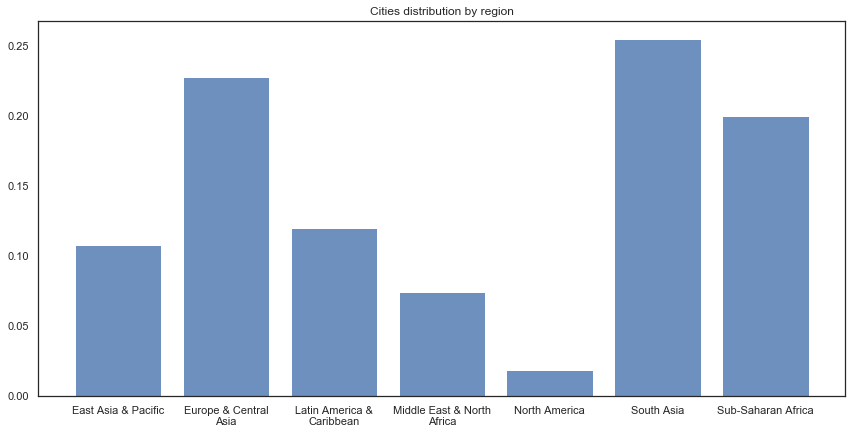

In [28]:
sns.set(style="white", palette="vlag", color_codes=True)
dxp.aggplot(agg='region', data=waste_cities_df_geo, aggfunc='sum',normalize='all').set_title('Cities distribution by region')

Text(0.5, 1, 'Cities distribution in percentage by region and income')

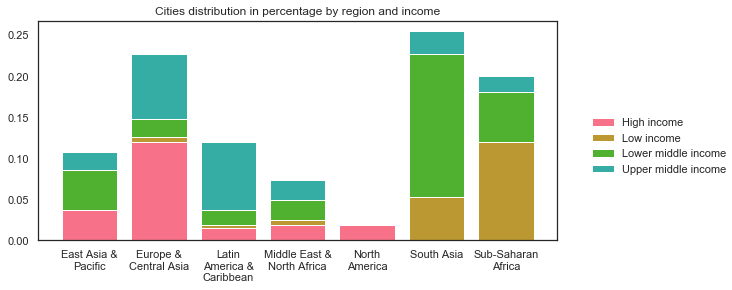

In [29]:
sns.set(style="white", palette="husl", color_codes=True)
dxp.aggplot(agg='region', data=waste_cities_df_geo, normalize='all', hue='incomeLevel',stacked=True,figsize=(8, 4)).set_title('Cities distribution in percentage by region and income')

In [30]:
cities_fifteen_higher_lower_waste_generation_geo = cities_fifteen_higher_lower_waste_generation.merge(wbcountries[['country_code','name','region','incomeLevel','longitude','latitude']], how = 'left', on = ['country_code'])
cities_fifteen_higher_lower_waste_generation_geo=cities_fifteen_higher_lower_waste_generation_geo.rename(columns={'name':'country'})

In [31]:


fig = px.bar(cities_fifteen_higher_lower_waste_generation_geo.sort_values(by='Waste_by_city_inhabitant_kg_year',ascending=False), x="Waste_by_city_inhabitant_kg_year", y="city_name", 
             orientation='h', hover_data=['country','region'],color='Waste_by_city_inhabitant_kg_year',text='incomeLevel',color_continuous_scale='Brwnyl',
             width=1000, height=700)
fig.update_layout(
    title="15 cities with lower waste generation and 15 cities with higher waste generation",
    xaxis_title="Waste generation by inhabitant (kg/year)",
    yaxis_title="City",font=dict(size=11)
    )

fig.show()
fig.write_html("15CitiesHigherLowerWasteGenerationInhab.html")



In [32]:
waste_cities_df.loc[waste_cities_df.country_code == 'FRA']

country_code region_id   income_id               city_name IF_SW_mgmt_dept  \
90          FRA       ECS  HighIncome  Angers-Loire Metropole             yes   
91          FRA       ECS  HighIncome                   Paris              no   

   IF_SW_mgmt_info IF_SW_control_enforcing_unit  \
90              no                          yes   
91              no                           no   

   LF_long_term_integrated_SW_master_plan LF_SW_master_plan_being_implemented  \
90                                    yes                                 yes   
91                                    yes                                 yes   

   LF_SW_mgmt_rules_and_regulations  ...  primary_collection_form  \
90                              yes  ...                    other   
91                              yes  ...             door to door   

   separation_metals separation_glass separation_organic  \
90               yes              yes                yes   
91                no              yes                yes   

   separation_paper_cardboard separation_plastics_packaging  \
90                        yes                           yes   
91                         no                            no   

   separation_existence MSW_generated_tons_year  recycling_percent  \
90                  yes                136405.0              17.66   
91                  yes               1092508.0              17.10   

    Waste_by_city_inhabitant_kg_year  
90                            491.54  
91                            484.64  

[2 rows x 21 columns]

In [33]:
show_cat_values(waste_cities_df,[''])

country_code  ,  ['AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN'
 'BFA' 'BGD' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BTN' 'BWA' 'CAN' 'CHE' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'CRI' 'CUB' 'CYP' 'CZE' 'DEU' 'DJI'
 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ESP' 'EST' 'ETH' 'FJI' 'FRA' 'FSM' 'GAB'
 'GBR' 'GHA' 'GIN' 'GMB' 'GRC' 'GTM' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND'
 'IRL' 'IRN' 'IRQ' 'ITA' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KOR'
 'LAO' 'LBN' 'LBR' 'LBY' 'LKA' 'LTU' 'LVA' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX'
 'MHL' 'MKD' 'MLI' 'MMR' 'MNE' 'MNG' 'MNP' 'MOZ' 'MWI' 'MYS' 'NAM' 'NER'
 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW'
 'PNG' 'POL' 'PRT' 'PRY' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU' 'SEN' 'SLB' 'SLE'
 'SLV' 'SOM' 'SRB' 'SSD' 'SVK' 'SVN' 'SWE' 'SYR' 'TGO' 'THA' 'TJK' 'TKM'
 'TLS' 'TON' 'TUN' 'TUR' 'TZA' 'UGA' 'UKR' 'URY' 'USA' 'UZB' 'VEN' 'VNM'
 'VUT' 'XKX' 'YEM' 'ZAF' 'ZMB' 'ZWE']
region_id  ,  ['SAS' 'SSF' 'ECS' 'MEA' 'LCN' 'EAS' 'NAC']
income_id  

In [34]:
binary_encoding(waste_cities_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 21 columns):
country_code                              326 non-null object
region_id                                 326 non-null object
income_id                                 326 non-null object
city_name                                 326 non-null object
IF_SW_mgmt_dept                           326 non-null int64
IF_SW_mgmt_info                           326 non-null int64
IF_SW_control_enforcing_unit              326 non-null int64
LF_long_term_integrated_SW_master_plan    326 non-null int64
LF_SW_master_plan_being_implemented       326 non-null int64
LF_SW_mgmt_rules_and_regulations          326 non-null int64
population                                326 non-null float64
primary_collection_form                   326 non-null object
separation_metals                         326 non-null int64
separation_glass                          326 non-null int64
separation_organic                

In [35]:
binary_variables = []
for x in waste_cities_df.columns:
        if waste_cities_df[x].dtypes==int:
            binary_variables.append(x)

binary_variables
binary_variables_country = binary_variables
binary_variables_country.append('country_code')
binary_variables_country

['IF_SW_mgmt_dept',
 'IF_SW_mgmt_info',
 'IF_SW_control_enforcing_unit',
 'LF_long_term_integrated_SW_master_plan',
 'LF_SW_master_plan_being_implemented',
 'LF_SW_mgmt_rules_and_regulations',
 'separation_metals',
 'separation_glass',
 'separation_organic',
 'separation_paper_cardboard',
 'separation_plastics_packaging',
 'separation_existence',
 'country_code']

In [36]:
cities_by_countries = pd.concat([waste_cities_df[['city_name','country_code']].groupby('country_code').count(),waste_cities_df[['population','MSW_generated_tons_year','country_code']].groupby('country_code').sum(),waste_cities_df[binary_variables].groupby('country_code').sum(),round(waste_cities_df[['recycling_percent','country_code']].groupby('country_code').mean(),2), waste_cities_df.groupby('country_code')['primary_collection_form'].apply(list)],axis=1)
cities_by_countries = cities_by_countries.rename(columns={'city_name':'cities_number','population':'cities_population'})
cities_by_countries = cities_by_countries.sort_values(by=['cities_number'], ascending=False)
cities_by_countries['primary_collection_form']=cities_by_countries['primary_collection_form'].apply(', '.join)
cities_by_countries['percent_cities_by_country']= round(cities_by_countries.cities_number*100/cities_by_countries.cities_number.sum(),2)
cities_by_countries['percent_population_dataset']= round(cities_by_countries.cities_population*100/cities_by_countries.cities_population.sum(),2)
cities_by_countries['cities_waste_generation_by_inhab']= cities_by_countries.MSW_generated_tons_year/cities_by_countries.cities_population
cities_by_countries

cities_number  cities_population  MSW_generated_tons_year  \
country_code                                                              
IND                      47        105828312.0              20754176.75   
NPL                      12          2381261.0                344118.35   
ETH                      11          3654694.0                504002.52   
LKA                       6           835024.0                470751.90   
JPN                       6          9672046.0               3436675.00   
...                     ...                ...                      ...   
IRQ                       1          7000000.0               3285000.00   
IRN                       1          8432000.0               2868170.00   
IRL                       1           527612.0                142889.00   
IDN                       1          9607787.0               2240735.00   
LBY                       1          1126000.0                263033.60   

              IF_SW_mgmt_dept  IF_SW_mgmt_info  IF_SW_control_enforcing_unit  \
country_code                                                                   
IND                        46                6                            39   
NPL                         0                0                             0   
ETH                         1                0                             0   
LKA                         5                0                             6   
JPN                         6                6                             6   
...                       ...              ...                           ...   
IRQ                         1                0                             0   
IRN                         1                0                             0   
IRL                         1                0                             1   
IDN                         1                0                             0   
LBY                         0                0                             0   

              LF_long_term_integrated_SW_master_plan  \
country_code                                           
IND                                               23   
NPL                                                3   
ETH                                                0   
LKA                                                1   
JPN                                                6   
...                                              ...   
IRQ                                                1   
IRN                                                1   
IRL                                                1   
IDN                                                1   
LBY                                                0   

              LF_SW_master_plan_being_implemented  \
country_code                                        
IND                                            13   
NPL                                             1   
ETH                                             0   
LKA                                             0   
JPN                                             6   
...                                           ...   
IRQ                                             1   
IRN                                             1   
IRL                                             1   
IDN                                             0   
LBY                                             0   

              LF_SW_mgmt_rules_and_regulations  separation_metals  \
country_code                                                        
IND                                         45                 19   
NPL                                         12                 12   
ETH                                          1                  0   
LKA                                          6                  6   
JPN                                          6                  6   
...                                        ...                ...   
IRQ                       

In [37]:
cities_by_countries.columns

Index(['cities_number', 'cities_population', 'MSW_generated_tons_year',
       'IF_SW_mgmt_dept', 'IF_SW_mgmt_info', 'IF_SW_control_enforcing_unit',
       'LF_long_term_integrated_SW_master_plan',
       'LF_SW_master_plan_being_implemented',
       'LF_SW_mgmt_rules_and_regulations', 'separation_metals',
       'separation_glass', 'separation_organic', 'separation_paper_cardboard',
       'separation_plastics_packaging', 'separation_existence',
       'recycling_percent', 'primary_collection_form',
       'percent_cities_by_country', 'percent_population_dataset',
       'cities_waste_generation_by_inhab'],
      dtype='object')

In [38]:
cities_by_countries.head(10)

cities_number  cities_population  MSW_generated_tons_year  \
country_code                                                              
IND                      47        105828312.0              20754176.75   
NPL                      12          2381261.0                344118.35   
ETH                      11          3654694.0                504002.52   
LKA                       6           835024.0                470751.90   
JPN                       6          9672046.0               3436675.00   
AFG                       5          5427835.0               2313148.55   
BGD                       5          9088995.0               1816350.70   
ZWE                       5          1719798.0                437146.50   
BDI                       4          1669705.0                226957.00   
MAR                       3          1942362.0                640205.00   

              IF_SW_mgmt_dept  IF_SW_mgmt_info  IF_SW_control_enforcing_unit  \
country_code                                                                   
IND                        46                6                            39   
NPL                         0                0                             0   
ETH                         1                0                             0   
LKA                         5                0                             6   
JPN                         6                6                             6   
AFG                         4                0                             0   
BGD                         5                0                             0   
ZWE                         1                0                             0   
BDI                         0                0                             0   
MAR                         2                1                             1   

              LF_long_term_integrated_SW_master_plan  \
country_code                                           
IND                                               23   
NPL                                                3   
ETH                                                0   
LKA                                                1   
JPN                                                6   
AFG                                                0   
BGD                                                0   
ZWE                                                0   
BDI                                                0   
MAR                                                2   

              LF_SW_master_plan_being_implemented  \
country_code                                        
IND                                            13   
NPL                                             1   
ETH                                             0   
LKA                                             0   
JPN                                             6   
AFG                                             0   
BGD                                             0   
ZWE                                             0   
BDI                                             0   
MAR                                             2   

              LF_SW_mgmt_rules_and_regulations  separation_metals  \
country_code                                                        
IND                                         45                 19   
NPL                                         12                 12   
ETH                                          1                  0   
LKA                                          6                  6   
JPN                                          6                  6   
AFG                                          5                  0   
BGD                                          0                  0   
ZWE                                          0                  0   
BDI                                          0                  0   
MAR                                          2                  0   

             

In [39]:
print('Number of countries represented by at least 2 cities:', len(cities_by_countries.loc[cities_by_countries.cities_number>=2]),'. They represent ',round(cities_by_countries.percent_cities_by_country.loc[cities_by_countries.cities_number>=2].sum(),2),'% of cities of the dataset.')
print('Number of countries represented by at least 3 cities:', len(cities_by_countries.loc[cities_by_countries.cities_number>=3]),'. They represent ',round(cities_by_countries.percent_cities_by_country.loc[cities_by_countries.cities_number>=3].sum(),2),'% of cities of the dataset.')

Number of countries represented by at least 2 cities: 75 . They represent  76.81 % of cities of the dataset.
Number of countries represented by at least 3 cities: 27 . They represent  47.53 % of cities of the dataset.


In [40]:
waste_cities_df.loc[waste_cities_df.country_code == 'CHN']

country_code region_id          income_id city_name  IF_SW_mgmt_dept  \
51          CHN       EAS  MiddleUpperIncome   Beijing                1   

    IF_SW_mgmt_info  IF_SW_control_enforcing_unit  \
51                0                             0   

    LF_long_term_integrated_SW_master_plan  \
51                                       0   

    LF_SW_master_plan_being_implemented  LF_SW_mgmt_rules_and_regulations  \
51                                    0                                 0   

    ...  primary_collection_form separation_metals  separation_glass  \
51  ...             not_informed                 0                 0   

    separation_organic  separation_paper_cardboard  \
51                   0                           0   

    separation_plastics_packaging  separation_existence  \
51                              0                     0   

    MSW_generated_tons_year  recycling_percent  \
51                7903000.0                0.0   

    Waste_by_city_inhabitant_kg_year  
51                            387.71  

[1 rows x 21 columns]

### It is quite surprising to check that among the most represented countries we have India with 47 cities and other asiatic countries such as Nepal (12 cities), Bengladesh (5 cities) or Sri Lanka (6 cities) or even more that Nepal is represented by 12 cities) while China is only represented by one. 

In [41]:
cities_by_countries = cities_by_countries.sort_values(by=['percent_population_dataset'], ascending=False)
cities_by_countries = cities_by_countries.reset_index()
cities_by_countries.head(10)

country_code  cities_number  cities_population  MSW_generated_tons_year  \
0          IND             47        105828312.0             2.075418e+07   
1          PAK              3         26845637.0             5.280906e+06   
2          BRA              3         21326791.0             8.903979e+06   
3          CHN              1         20384000.0             7.903000e+06   
4          RUS              3         16987000.0             7.989254e+06   
5          NGA              3         12482000.0             2.297500e+06   
6          COD              1         11587000.0             2.555000e+06   
7          VNM              2         11610900.0             4.909250e+06   
8          COL              3         11528596.0             2.892755e+06   
9          MEX              3         11420399.0             5.784915e+06   

   IF_SW_mgmt_dept  IF_SW_mgmt_info  IF_SW_control_enforcing_unit  \
0               46                6                            39   
1                1                0                             1   
2                3                3                             0   
3                1                0                             0   
4                3                0                             1   
5                1                0                             0   
6                1                0                             0   
7                2                0                             2   
8                1                1                             0   
9                1                1                             0   

   LF_long_term_integrated_SW_master_plan  \
0                                      23   
1                                       2   
2                                       3   
3                                       0   
4                                       2   
5                                       0   
6                                       0   
7                                       0   
8                                       3   
9                                       2   

   LF_SW_master_plan_being_implemented  LF_SW_mgmt_rules_and_regulations  ...  \
0                                   13                                45  ...   
1                                    1                                 2  ...   
2                                    0                                 3  ...   
3                                    0                                 0  ...   
4                                    0                                 3  ...   
5                                    0                                 1  ...   
6                                    0                                 1  ...   
7                                    0                                 1  ...   
8                                    3                                 3  ...   
9                                    1                                 3  ...   

   separation_glass  separation_organic  separation_paper_cardboard  \
0                19                  24                          20   
1                 1                   0                           1   
2                 2                   1                           2   
3                 0                   0                           0   
4                 0                   0                           0   
5                 0                   0                           0   
6                 0                   0                           0   
7                 1                   1                           1   
8                 0                   0                           0   
9                 0                   1                           0   

   separation_plastics_packaging  separation_existence  recycling_percent  \
0                             18                    29               3.23   
1                              1                     0               0

In [99]:
cities_by_countries_geo = cities_by_countries.merge(wbcountries[['country_code','name','region','incomeLevel','longitude','latitude']], how = 'left', on = ['country_code'])
cities_by_countries_geo = cities_by_countries_geo.sort_values(by=['cities_number'], ascending=False)
cities_by_countries_geo

country_code  cities_number  cities_population  MSW_generated_tons_year  \
0            IND             47        105828312.0              20754176.75   
1            NPL             12          2381261.0                344118.35   
2            ETH             11          3654694.0                504002.52   
3            LKA              6           835024.0                470751.90   
4            JPN              6          9672046.0               3436675.00   
..           ...            ...                ...                      ...   
98           SLV              1          1097000.0                293747.00   
97           SOM              1           607000.0                 80000.00   
96           VEN              1          3220540.0               1787940.00   
95           SLE              1           800000.0                163520.00   
149          LBY              1          1126000.0                263033.60   

     IF_SW_mgmt_dept  IF_SW_mgmt_info  IF_SW_control_enforcing_unit  \
0                 46                6                            39   
1                  0                0                             0   
2                  1                0                             0   
3                  5                0                             6   
4                  6                6                             6   
..               ...              ...                           ...   
98                 1                0                             0   
97                 0                0                             0   
96                 1                1                             0   
95                 0                0                             0   
149                0                0                             0   

     LF_long_term_integrated_SW_master_plan  \
0                                        23   
1                                         3   
2                                         0   
3                                         1   
4                                         6   
..                                      ...   
98                                        0   
97                                        0   
96                                        0   
95                                        0   
149                                       0   

     LF_SW_master_plan_being_implemented  LF_SW_mgmt_rules_and_regulations  \
0                                     13                                45   
1                                      1                                12   
2                                      0                                 1   
3                                      0                                 6   
4                                      6                                 6   
..                                   ...                               ...   
98                                     0                                 1   
97                                     0                                 0   
96                                     0                                 1   
95                                     0                                 0   
149                                    0                                 0   

     ...  separation_paper_cardboard  separation_plastics_packaging  \
0    ...                          20                             18   
1    ...                          12                             12   
2    ...                           0                              0   
3    ...                           6                              6   
4    ...                           6                              5   
..   ...                         ...                            ...   
98   ...                           0                              0   
97   ...                           0                              0   
96   ...                           0                         

In [101]:
cities_by_countries_geo.head(15)

country_code  cities_number  cities_population  MSW_generated_tons_year  \
0           IND             47        105828312.0              20754176.75   
1           NPL             12          2381261.0                344118.35   
2           ETH             11          3654694.0                504002.52   
3           LKA              6           835024.0                470751.90   
4           JPN              6          9672046.0               3436675.00   
5           AFG              5          5427835.0               2313148.55   
6           BGD              5          9088995.0               1816350.70   
7           ZWE              5          1719798.0                437146.50   
8           BDI              4          1669705.0                226957.00   
18          ARG              3          5504990.0               3459470.00   
26          ZAF              3         10603827.0               4540491.00   
24          BRA              3         21326791.0               8903979.00   
23          GTM              3          3412869.0                550283.00   
22          USA              3          1632322.0               1401602.59   
21          COL              3         11528596.0               2892755.00   

    IF_SW_mgmt_dept  IF_SW_mgmt_info  IF_SW_control_enforcing_unit  \
0                46                6                            39   
1                 0                0                             0   
2                 1                0                             0   
3                 5                0                             6   
4                 6                6                             6   
5                 4                0                             0   
6                 5                0                             0   
7                 1                0                             0   
8                 0                0                             0   
18                1                1                             0   
26                1                0                             0   
24                3                3                             0   
23                0                0                             0   
22                3                1                             0   
21                1                1                             0   

    LF_long_term_integrated_SW_master_plan  \
0                                       23   
1                                        3   
2                                        0   
3                                        1   
4                                        6   
5                                        0   
6                                        0   
7                                        0   
8                                        0   
18                                       1   
26                                       1   
24                                       3   
23                                       0   
22                                       2   
21                                       3   

    LF_SW_master_plan_being_implemented  LF_SW_mgmt_rules_and_regulations  \
0                                    13                                45   
1                                     1                                12   
2                                     0                                 1   
3                                     0                                 6   
4                                     6                                 6   
5                                     0                                 5   
6                                     0                                 0   
7                                     0                                 0   
8                                     0                                 0   
18                                    0                                 2   
26                                    1          

Text(0.5, 1.0, '15 countries with more cities represented')

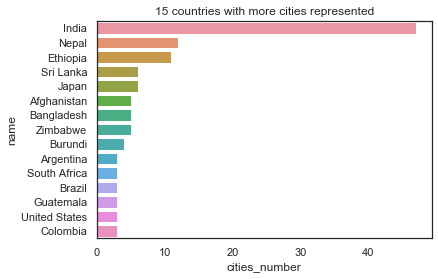

In [100]:
sns.barplot(y="name", x="cities_number", data=cities_by_countries_geo.head(15)).set_title('15 countries with more cities represented')

In [42]:
cities_by_countries_geo = cities_by_countries_geo.sort_values(by=['incomeLevel'], ascending=False)
cities_by_countries_geo

country_code  cities_number  cities_population  MSW_generated_tons_year  \
108          TKM              1           746000.0                164000.00   
139          FJI              1            86000.0                 24272.50   
31           DOM              1          3976012.0               1818889.00   
71           SRB              2          1706883.0                902465.00   
33           TUR              2          3690488.0               1427850.00   
..           ...            ...                ...                      ...   
66           AUT              1          1741246.0               1036879.00   
119          EST              1           391000.0                202011.00   
64           NZL              2          1797700.0                528852.00   
91           GRC              2          1018336.0                441068.34   
149          PLW              1            11754.0                  1369.00   

     IF_SW_mgmt_dept  IF_SW_mgmt_info  IF_SW_control_enforcing_unit  \
108                0                0                             0   
139                1                0                             1   
31                 1                0                             0   
71                 2                0                             1   
33                 0                0                             0   
..               ...              ...                           ...   
66                 1                0                             0   
119                1                1                             1   
64                 2                1                             0   
91                 0                0                             0   
149                1                0                             1   

     LF_long_term_integrated_SW_master_plan  \
108                                       0   
139                                       0   
31                                        0   
71                                        2   
33                                        1   
..                                      ...   
66                                        0   
119                                       0   
64                                        2   
91                                        0   
149                                       0   

     LF_SW_master_plan_being_implemented  LF_SW_mgmt_rules_and_regulations  \
108                                    0                                 1   
139                                    0                                 1   
31                                     0                                 0   
71                                     0                                 1   
33                                     1                                 0   
..                                   ...                               ...   
66                                     0                                 1   
119                                    0                                 0   
64                                     2                                 2   
91                                     0                                 1   
149                                    0                                 1   

     ...  recycling_percent               primary_collection_form  \
108  ...               0.00                          not_informed   
139  ...               0.00                              curbside   
31   ...               0.00                              multiple   
71   ...               1.00  curbside, centralized drop-off point   
33   ...               1.25            not_informed, not_informed   
..   ...                ...                                   ...   
66   ...               0.00                          door to door   
119  ...               0.00                          not_informed   
64   ...               5.00                curbside, not_informed   
91   ...  

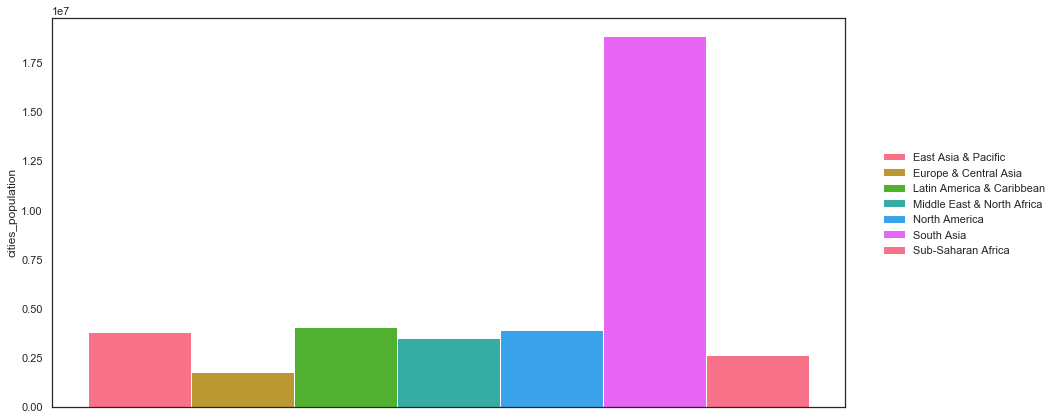

In [43]:
dxp.aggplot(agg='cities_population', data=cities_by_countries_geo, hue='region', normalize='cities_population')

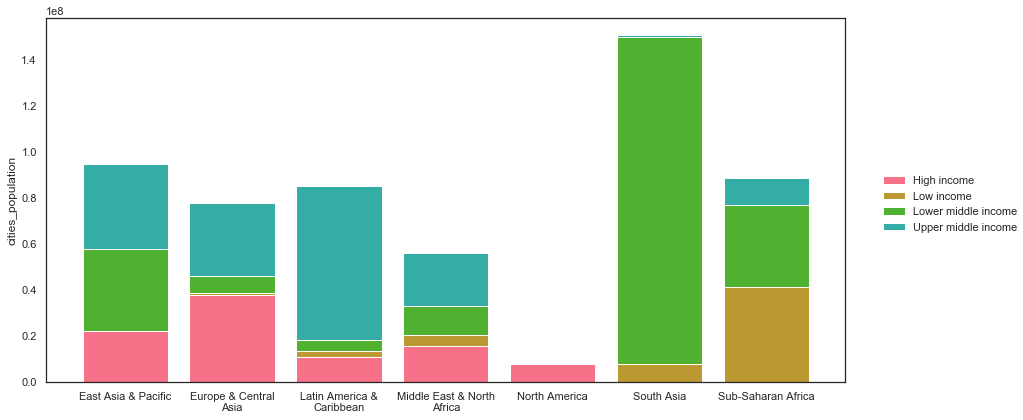

In [44]:
dxp.aggplot(agg='cities_population', data=cities_by_countries_geo, hue='incomeLevel', groupby='region', aggfunc='sum', stacked=True)


In [45]:
cities_by_countries_geo = cities_by_countries_geo.sort_values(by=['recycling_percent'], ascending=False)
cities_by_countries_geo[['country_code','cities_number','cities_population','recycling_percent']].head(25)

country_code  cities_number  cities_population  recycling_percent
125          AUS              1           353626.0              70.00
123          SVN              1           309261.0              61.00
77           ITA              2          1429673.0              60.95
117          IRL              1           527612.0              49.00
124          CHE              1           358000.0              43.22
79           NOR              2          1257949.0              41.80
18           GBR              2          8623241.0              37.52
12           KOR              1         10204000.0              36.00
72           USA              3          1632322.0              33.35
23           CAN              3          6199274.0              30.14
78           URY              1          1319108.0              29.00
35           DEU              1          3563000.0              28.00
56           BEL              2          2175214.0              26.50
92           SWE              2          1003700.0              25.00
104          LTU              2           809691.0              24.50
36           ARE              2          3560000.0              22.50
39           ESP              2          3360885.0              21.00
32           PHL              2          3863000.0              21.00
13           JPN              6          9672046.0              19.13
47           FRA              2          2531768.0              17.38
74           POL              2          1470108.0              16.50
8            COL              3         11528596.0              16.00
101          NLD              1           799345.0              14.00
103          LBN              2           800000.0              12.50
49           YEM              1          2330689.0              12.00

In [46]:
cities_countries_recycling = cities_by_countries_geo.loc[cities_by_countries_geo.recycling_percent>0]
cities_countries_recycling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 125 to 54
Data columns (total 26 columns):
country_code                              75 non-null object
cities_number                             75 non-null int64
cities_population                         75 non-null float64
MSW_generated_tons_year                   75 non-null float64
IF_SW_mgmt_dept                           75 non-null int64
IF_SW_mgmt_info                           75 non-null int64
IF_SW_control_enforcing_unit              75 non-null int64
LF_long_term_integrated_SW_master_plan    75 non-null int64
LF_SW_master_plan_being_implemented       75 non-null int64
LF_SW_mgmt_rules_and_regulations          75 non-null int64
separation_metals                         75 non-null int64
separation_glass                          75 non-null int64
separation_organic                        75 non-null int64
separation_paper_cardboard                75 non-null int64
separation_plastics_packaging             75 non-n

In [47]:
cities_by_countries_geo['NumIncome']=cities_by_countries_geo.incomeLevel.copy()
cities_by_countries_geo['NumIncome'].loc[cities_by_countries_geo.incomeLevel=='High income']=4
cities_by_countries_geo['NumIncome'].loc[cities_by_countries_geo.incomeLevel=='Upper middle income']=3
cities_by_countries_geo['NumIncome'].loc[cities_by_countries_geo.incomeLevel=='Lower middle income']=2
cities_by_countries_geo['NumIncome'].loc[cities_by_countries_geo.incomeLevel=='Low income']=1

/Users/marike/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
cities_by_countries_geo

country_code  cities_number  cities_population  MSW_generated_tons_year  \
125          AUS              1           353626.0                350000.00   
123          SVN              1           309261.0                 98410.00   
77           ITA              2          1429673.0                765300.44   
117          IRL              1           527612.0                142889.00   
124          CHE              1           358000.0                 59000.00   
..           ...            ...                ...                      ...   
17           EGY              1          9000000.0               5475000.00   
148          SLB              1            78000.0                 29000.00   
147          VUT              1            44039.0                 27000.00   
138          COG              1            95000.0                 17550.00   
149          PLW              1            11754.0                  1369.00   

     IF_SW_mgmt_dept  IF_SW_mgmt_info  IF_SW_control_enforcing_unit  \
125                1                1                             0   
123                1                0                             0   
77                 0                1                             0   
117                1                0                             1   
124                0                0                             0   
..               ...              ...                           ...   
17                 1                0                             1   
148                1                0                             0   
147                1                0                             1   
138                0                0                             0   
149                1                0                             1   

     LF_long_term_integrated_SW_master_plan  \
125                                       1   
123                                       1   
77                                        1   
117                                       1   
124                                       0   
..                                      ...   
17                                        0   
148                                       0   
147                                       0   
138                                       0   
149                                       0   

     LF_SW_master_plan_being_implemented  LF_SW_mgmt_rules_and_regulations  \
125                                    1                                 1   
123                                    0                                 1   
77                                     1                                 2   
117                                    1                                 1   
124                                    0                                 0   
..                                   ...                               ...   
17                                     0                                 0   
148                                    0                                 1   
147                                    0                                 0   
138                                    0                                 1   
149                                    0                                 1   

     ...  primary_collection_form  percent_cities_by_country  \
125  ...                 curbside                       0.31   
123  ...                    other                       0.31   
77   ...   multiple, door to door                       0.61   
117  ...                 multiple                       0.31   
124  ...             not_informed                       0.31   
..   ...                      ...                        ...   
17   ...             door to door                       0.31   
148  ...             door to door                       0.31   
147  ...             door to door                       0.31   
138  ...             door to door                       0.31

In [49]:
df=cities_by_countries_geo.sort_values(by="NumIncome",ascending=True)

fig = go.Figure()

fig = px.bar(df, y="incomeLevel", x="cities_population", color="region", orientation="h", hover_name="name",color_discrete_map={
                "Europe & Central Asia": "#636EFA",
                "Sub-Saharan Africa ": "#B6E880",
                "Middle East & North Africa": "#00CC96",
                "East Asia & Pacific": "#AB63FA",
                "South Asia": "#FECB52",
                'Latin America & Caribbean ':'#19D3F3',
             'North America':'#FF6692'
             })


fig.update_layout(title_text='Countries and regions representation in cities dataset')

fig.show()
fig.write_html("PxBarCountriesRegionCDS.html")

In [50]:
df=cities_by_countries_geo.sort_values(by="region",ascending=False)

fig = go.Figure()

fig = px.bar(df, y="region", x="cities_population", color="incomeLevel", orientation="h", hover_name="name",color_discrete_map={
                 "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })


fig.update_layout(title_text='Countries and income representation in cities dataset')

fig.show()
fig.write_html("PxBarCountriesIncomeCDS.html")

In [51]:
df=cities_by_countries_geo.sort_values(by="region",ascending=False)

fig = go.Figure()

fig = px.bar(df, y="region", x="percent_population_dataset", color="incomeLevel", orientation="h", hover_name="name",color_discrete_map={
                 "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })


fig.update_layout(title_text='Countries and region representation in percentage of cities dataset population')

fig.show()
fig.write_html("PxBarCountriesIncomePercPopCDS.html")

In [52]:
df=cities_by_countries_geo.sort_values(by="NumIncome",ascending=True)

fig = go.Figure()

fig = px.bar(df, y="incomeLevel", x="cities_population", color="region", orientation="h", hover_name="name",color_discrete_map={
                "Europe & Central Asia": "#636EFA",
                "Sub-Saharan Africa ": "#B6E880",
                "Middle East & North Africa": "#00CC96",
                "East Asia & Pacific": "#AB63FA",
                "South Asia": "#FECB52",
                'Latin America & Caribbean ':'#19D3F3',
             'North America':'#FF6692'
             })


fig.update_layout(title_text='Countries and regions representation in cities dataset')

fig.show()
fig.write_html("PxBarCountriesRegionCDS.html")

In [53]:
df=(cities_by_countries_geo.loc[cities_by_countries_geo.recycling_percent != 0]).sort_values(by="NumIncome",ascending=True)

fig = go.Figure()

fig = px.bar(df, y="incomeLevel", x="cities_population", color="recycling_percent", orientation="h", hover_name="name",color_continuous_scale='bluyl')


fig.update_layout(title_text='Countries declaring a recycling percent in cities dataset')

fig.show()

In [54]:
cities_countries_recycling.recycling_percent.describe()

count    75.000000
mean     13.190267
std      15.675637
min       0.300000
25%       2.720000
50%       5.870000
75%      18.255000
max      70.000000
Name: recycling_percent, dtype: float64

Number of cities with recycling rate: 123 .


Text(0.5, 1.0, 'Boxplot of recycling rate in cities (when existing)')

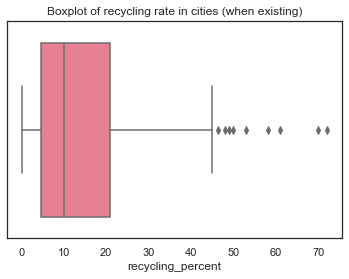

In [55]:
print('Number of cities with recycling rate:',len(waste_cities_df.recycling_percent.loc[waste_cities_df.recycling_percent>0]),'.')
sns.boxplot(waste_cities_df.recycling_percent.loc[waste_cities_df.recycling_percent>0]).set_title('Boxplot of recycling rate in cities (when existing)')

Number of countries with recycling rate according cities dataset: 75 .


Text(0.5, 1.0, 'Boxplot of recycling rate in countries based on cities dataset \n(mean of cities rate for each country)')

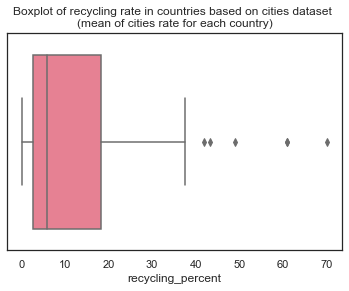

In [56]:
print('Number of countries with recycling rate according cities dataset:',len(cities_by_countries_geo.loc[cities_by_countries_geo.recycling_percent>0]),'.')
sns.boxplot(cities_by_countries_geo.recycling_percent.loc[cities_by_countries_geo.recycling_percent>0]).set_title('Boxplot of recycling rate in countries based on cities dataset \n(mean of cities rate for each country)')

In [57]:
cities_countries_recycling.loc[cities_countries_recycling.recycling_percent>30]

country_code  cities_number  cities_population  MSW_generated_tons_year  \
125          AUS              1           353626.0                350000.00   
123          SVN              1           309261.0                 98410.00   
77           ITA              2          1429673.0                765300.44   
117          IRL              1           527612.0                142889.00   
124          CHE              1           358000.0                 59000.00   
79           NOR              2          1257949.0                431404.00   
18           GBR              2          8623241.0               3726990.00   
12           KOR              1         10204000.0               3353985.00   
72           USA              3          1632322.0               1401602.59   
23           CAN              3          6199274.0               2177219.00   

     IF_SW_mgmt_dept  IF_SW_mgmt_info  IF_SW_control_enforcing_unit  \
125                1                1                             0   
123                1                0                             0   
77                 0                1                             0   
117                1                0                             1   
124                0                0                             0   
79                 1                1                             0   
18                 1                1                             0   
12                 0                0                             0   
72                 3                1                             0   
23                 3                2                             0   

     LF_long_term_integrated_SW_master_plan  \
125                                       1   
123                                       1   
77                                        1   
117                                       1   
124                                       0   
79                                        2   
18                                        2   
12                                        0   
72                                        2   
23                                        3   

     LF_SW_master_plan_being_implemented  LF_SW_mgmt_rules_and_regulations  \
125                                    1                                 1   
123                                    0                                 1   
77                                     1                                 2   
117                                    1                                 1   
124                                    0                                 0   
79                                     1                                 0   
18                                     0                                 2   
12                                     0                                 0   
72                                     2                                 3   
23                                     3                                 3   

     ...  recycling_percent           primary_collection_form  \
125  ...              70.00                          curbside   
123  ...              61.00                             other   
77   ...              60.95            multiple, door to door   
117  ...              49.00                          multiple   
124  ...              43.22                      not_informed   
79   ...              41.80            not_informed, curbside   
18   ...              37.52            door to door, curbside   
12   ...              36.00                      door to door   
72   ...              33.35  curbside, curbside, not_informed   
23   ...              30.14      curbside, curbside, curbside   

     percent_cities_by_country  percent_population_dataset  \
125                       0.31                        0.06   
123                       0.31                        0.06   
77                        0.61                        0.25   
117        

In [58]:
recycling_countries_region = pd.DataFrame(cities_countries_recycling.groupby('region')['recycling_percent'].count())
recycling_countries_region.rename(columns={'recycling_percent':'number countries recycling CDS'},inplace=True)
recycling_countries_region['percent recycling countries CDS'] = round(recycling_countries_region['number countries recycling CDS']*100/cities_by_countries_geo.groupby('region')['name'].count(),2)
recycling_countries_region

number countries recycling CDS  \
region                                                       
East Asia & Pacific                                     15   
Europe & Central Asia                                   27   
Latin America & Caribbean                               14   
Middle East & North Africa                               7   
North America                                            2   
South Asia                                               4   
Sub-Saharan Africa                                       6   

                            percent recycling countries CDS  
region                                                       
East Asia & Pacific                                   60.00  
Europe & Central Asia                                 61.36  
Latin America & Caribbean                             66.67  
Middle East & North Africa                            43.75  
North America                                        100.00  
South Asia                                            50.00  
Sub-Saharan Africa                                    17.65

In [59]:
recycling_countries_income_num = pd.DataFrame(cities_countries_recycling.groupby('incomeLevel')['recycling_percent'].count())
recycling_countries_income_mean = pd.DataFrame(round(cities_by_countries_geo.groupby('incomeLevel')['recycling_percent'].mean(),2))
recycling_countries_income_num.rename(columns={'recycling_percent':'number of recycling countries (CDS)'},inplace=True)
recycling_countries_income_mean.rename(columns={'recycling_percent':'average recycling percent by Income'},inplace=True)
recycling_countries_income_num['number of countries (CDS)']=cities_by_countries_geo.groupby('incomeLevel')['name'].count()
recycling_countries_income_num['percent recycling countries CDS']=round(recycling_countries_income_num['number of recycling countries (CDS)']*100/cities_by_countries_geo.groupby('incomeLevel')['name'].count(),2)
recycling_countries_income = pd.concat([recycling_countries_income_num,recycling_countries_income_mean], axis=1, sort=False)
recycling_table = recycling_countries_income.sort_values(by='average recycling percent by Income',ascending=False)

cm = sns.light_palette("green", as_cmap=True)
from docx import Document
document = Document()
style = document.styles['Normal']
font = style.font

from docx.shared import Pt
font.name = 'arial'
font.size = Pt(36)

styled_recycling_table = recycling_table.style.background_gradient(cmap=cm)
styled_recycling_table


In [60]:
import plotly.express as px

fig = px.scatter_geo(cities_by_countries_geo, lon = cities_by_countries_geo['longitude'],
        lat = cities_by_countries_geo['latitude'],text = cities_by_countries_geo['percent_population_dataset'], color=cities_by_countries_geo['incomeLevel'],
                     hover_name=cities_by_countries_geo['name'], size=cities_by_countries_geo['cities_number'],
                     projection="natural earth",color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })
fig.update_layout(
        title = 'Number of cities considered by countries'
    )
fig.show()
fig.write_html("CountriesRepresentationAccCitiesDataset.html")



In [61]:
import plotly.express as px

fig = px.scatter_geo(cities_by_countries_geo, lon = cities_by_countries_geo['longitude'],
        lat = cities_by_countries_geo['latitude'],text = cities_by_countries_geo['cities_number'], color=cities_by_countries_geo['incomeLevel'],
                     hover_name=cities_by_countries_geo['name'], size=cities_by_countries_geo['percent_population_dataset'],
                     projection="natural earth",color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })
fig.update_layout(
        title = 'Countries representation in cities dataset according to the considered cities population'
    )
fig.show()
fig.write_html("CountriesRepresentationAccPopulationCitiesDataset.html")



In [62]:
import plotly.express as px
fig = px.scatter_geo(cities_by_countries_geo, lon = cities_by_countries_geo['longitude'],
        lat = cities_by_countries_geo['latitude'], color="incomeLevel",
                     hover_name="name", size="cities_waste_generation_by_inhab",
                     projection="natural earth",color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })
fig.update_layout(
        title = 'Waste generation by inhabitant based on cities dataset'
    )
fig.show()

fig.write_html("waste_by_inhab_cities_dataset.html")

In [63]:
cities_by_countries_geo_waste_inhab = cities_by_countries_geo.sort_values(by=['cities_waste_generation_by_inhab'], ascending=False)
cities_by_countries_geo_waste_inhab.columns

Index(['country_code', 'cities_number', 'cities_population',
       'MSW_generated_tons_year', 'IF_SW_mgmt_dept', 'IF_SW_mgmt_info',
       'IF_SW_control_enforcing_unit',
       'LF_long_term_integrated_SW_master_plan',
       'LF_SW_master_plan_being_implemented',
       'LF_SW_mgmt_rules_and_regulations', 'separation_metals',
       'separation_glass', 'separation_organic', 'separation_paper_cardboard',
       'separation_plastics_packaging', 'separation_existence',
       'recycling_percent', 'primary_collection_form',
       'percent_cities_by_country', 'percent_population_dataset',
       'cities_waste_generation_by_inhab', 'name', 'region', 'incomeLevel',
       'longitude', 'latitude', 'NumIncome'],
      dtype='object')

In [64]:
cities_countries_fifteen_higher_lower_waste_generation = pd.concat([cities_by_countries_geo_waste_inhab.head(15),cities_by_countries_geo_waste_inhab.tail(15)])
cities_countries_fifteen_higher_lower_waste_generation.cities_waste_generation_by_inhab=round(cities_countries_fifteen_higher_lower_waste_generation.cities_waste_generation_by_inhab*1000,0)
cities_countries_fifteen_higher_lower_waste_generation[['cities_number','cities_population','cities_waste_generation_by_inhab', 'name', 'region', 'incomeLevel',
       'longitude', 'latitude']]

cities_number  cities_population  cities_waste_generation_by_inhab  \
36               2          3560000.0                            1046.0   
125              1           353626.0                             990.0   
72               3          1632322.0                             859.0   
39               2          3360885.0                             831.0   
50               1          2374000.0                             828.0   
76               1          1377000.0                             799.0   
86               2          1146900.0                             748.0   
81               1          1257000.0                             694.0   
142              1            49000.0                             661.0   
145              1            55014.0                             658.0   
11               2         10446000.0                             630.0   
25               3          5504990.0                             628.0   
147              1            44039.0                             613.0   
17               1          9000000.0                             608.0   
66               1          1741246.0                             595.0   
24               2          5802000.0                             184.0   
144              1            46000.0                             182.0   
95               1           816000.0                             179.0   
60               2          2158000.0                             175.0   
134              2           141990.0                             172.0   
124              1           358000.0                             165.0   
38               3          3412869.0                             161.0   
44               1          2610000.0                             154.0   
51              12          2381261.0                             145.0   
34              11          3654694.0                             138.0   
75               2          1432000.0                             136.0   
69               4          1669705.0                             136.0   
146              1            34574.0                             132.0   
110              1           607000.0                             132.0   
149              1            11754.0                             116.0   

                         name                      region  \
36       United Arab Emirates  Middle East & North Africa   
125                 Australia         East Asia & Pacific   
72              United States               North America   
39                      Spain       Europe & Central Asia   
50                 Azerbaijan       Europe & Central Asia   
76                   Mongolia         East Asia & Pacific   
86            Kyrgyz Republic       Europe & Central Asia   
81                     Rwanda         Sub-Saharan Africa    
142  Northern Mariana Islands         East Asia & Pacific   
145                    Cyprus       Europe & Central Asia   
11               Saudi Arabia  Middle East & North Africa   
25                  Argentina  Latin America & Caribbean    
147                   Vanuatu         East Asia & Pacific   
17           Egypt, Arab Rep.  Middle East & North Africa   
66                    Austria       Europe & Central Asia   
24                    Myanmar         East Asia & Pacific   
144                  Kiribati         East Asia & Pacific   
95                      Niger         Sub-Saharan Africa    
60                       Mali         Sub-Saharan Africa    
134                    Bhutan                  South Asia   
124               Switzerland       Europe & Central Asia   
38                  Guatemala  Latin America & Caribbean    
44                 Madagascar         Sub-Saharan Africa    
51                      Nepal                  South Asia   
34                   Ethiopia         Sub-Saharan Africa    
75                     Malawi         Sub-Saharan Africa    
69                    Burundi   

In [65]:
fig = px.bar(cities_countries_fifteen_higher_lower_waste_generation.sort_values(by='cities_waste_generation_by_inhab',ascending=False), x="cities_waste_generation_by_inhab", y="name", 
             orientation='h', hover_data=['cities_number','incomeLevel','region'],color='cities_waste_generation_by_inhab',text='incomeLevel',
             width=1000, height=700,color_continuous_scale='Brwnyl')
fig.update_layout(
    title="15 countries with lower waste generation and 15 countries with higher waste generation according cities dataset",
    xaxis_title="Waste generation by inhabitant (kg/year)",
    yaxis_title="name",font=dict(size=11)
    )

fig.show()
fig.write_html("15CountriesHigherLowerWasteGenerationInhabCDS.html")

In [66]:
import plotly.express as px
fig = px.scatter_geo(cities_by_countries_geo, lon = cities_by_countries_geo['longitude'],
        lat = cities_by_countries_geo['latitude'], color="incomeLevel",
                     hover_name="name", size="recycling_percent",
                     projection="natural earth",color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })
fig.update_layout(
        title = 'Recycling rate based on cities dataset'
    )
fig.show()

fig.write_html("Map_recycling_rates_income.html")


In [67]:
import plotly.express as px
fig = px.scatter_geo(cities_by_countries_geo, lon = cities_by_countries_geo['longitude'],
        lat = cities_by_countries_geo['latitude'], color="recycling_percent",
                     hover_name="name", size="recycling_percent",
                     projection="natural earth"
             )
fig.update_layout(
        title = 'Recycling rate based on cities dataset'
    )
fig.show()

fig.write_html("Map_recycling_rates.html")

### I am really wondering about the representativity of this dataset since choice of included cities seems quite random...

In [68]:
cities_by_countries_geo.columns

Index(['country_code', 'cities_number', 'cities_population',
       'MSW_generated_tons_year', 'IF_SW_mgmt_dept', 'IF_SW_mgmt_info',
       'IF_SW_control_enforcing_unit',
       'LF_long_term_integrated_SW_master_plan',
       'LF_SW_master_plan_being_implemented',
       'LF_SW_mgmt_rules_and_regulations', 'separation_metals',
       'separation_glass', 'separation_organic', 'separation_paper_cardboard',
       'separation_plastics_packaging', 'separation_existence',
       'recycling_percent', 'primary_collection_form',
       'percent_cities_by_country', 'percent_population_dataset',
       'cities_waste_generation_by_inhab', 'name', 'region', 'incomeLevel',
       'longitude', 'latitude', 'NumIncome'],
      dtype='object')

In [69]:
IF_CDS_Cities_income = pd.concat([cities_by_countries_geo[['cities_number','IF_SW_mgmt_dept', 'IF_SW_mgmt_info','IF_SW_control_enforcing_unit','LF_long_term_integrated_SW_master_plan',
       'LF_SW_master_plan_being_implemented',
       'LF_SW_mgmt_rules_and_regulations', 'separation_metals',
       'separation_glass', 'separation_organic', 'separation_paper_cardboard',
       'separation_plastics_packaging', 'separation_existence','incomeLevel']].groupby('incomeLevel').sum()],axis=1)
IF_CDS_Cities_income


cities_number  IF_SW_mgmt_dept  IF_SW_mgmt_info  \
incomeLevel                                                            
High income                     68               47               18   
Low income                      61               15                0   
Lower middle income            114               91                9   
Upper middle income             83               48               16   

                     IF_SW_control_enforcing_unit  \
incomeLevel                                         
High income                                    17   
Low income                                      5   
Lower middle income                            60   
Upper middle income                            20   

                     LF_long_term_integrated_SW_master_plan  \
incomeLevel                                                   
High income                                              43   
Low income                                                5   
Lower middle income                                      39   
Upper middle income                                      31   

                     LF_SW_master_plan_being_implemented  \
incomeLevel                                                
High income                                           34   
Low income                                             2   
Lower middle income                                   24   
Upper middle income                                   18   

                     LF_SW_mgmt_rules_and_regulations  separation_metals  \
incomeLevel                                                                
High income                                        45                 40   
Low income                                         30                 13   
Lower middle income                                78                 30   
Upper middle income                                50                 18   

                     separation_glass  separation_organic  \
incomeLevel                                                 
High income                        44                  29   
Low income                         13                  13   
Lower middle income                30                  32   
Upper middle income                18                  10   

                     separation_paper_cardboard  \
incomeLevel                                       
High income                                  44   
Low income                                   13   
Lower middle income                          32   
Upper middle income                          21   

                     separation_plastics_packaging  separation_existence  
incomeLevel                                                               
High income                                     42                    38  
Low income                                      13                     1  
Lower middle income                             29                    43  
Upper middle income                             21                    23

In [70]:
IF_CDS_Cities_income['NumIncome']=[4,1,2,3]
IF_CDS_Cities_income

cities_number  IF_SW_mgmt_dept  IF_SW_mgmt_info  \
incomeLevel                                                            
High income                     68               47               18   
Low income                      61               15                0   
Lower middle income            114               91                9   
Upper middle income             83               48               16   

                     IF_SW_control_enforcing_unit  \
incomeLevel                                         
High income                                    17   
Low income                                      5   
Lower middle income                            60   
Upper middle income                            20   

                     LF_long_term_integrated_SW_master_plan  \
incomeLevel                                                   
High income                                              43   
Low income                                                5   
Lower middle income                                      39   
Upper middle income                                      31   

                     LF_SW_master_plan_being_implemented  \
incomeLevel                                                
High income                                           34   
Low income                                             2   
Lower middle income                                   24   
Upper middle income                                   18   

                     LF_SW_mgmt_rules_and_regulations  separation_metals  \
incomeLevel                                                                
High income                                        45                 40   
Low income                                         30                 13   
Lower middle income                                78                 30   
Upper middle income                                50                 18   

                     separation_glass  separation_organic  \
incomeLevel                                                 
High income                        44                  29   
Low income                         13                  13   
Lower middle income                30                  32   
Upper middle income                18                  10   

                     separation_paper_cardboard  \
incomeLevel                                       
High income                                  44   
Low income                                   13   
Lower middle income                          32   
Upper middle income                          21   

                     separation_plastics_packaging  separation_existence  \
incomeLevel                                                                
High income                                     42                    38   
Low income                                      13                     1   
Lower middle income                             29                    43   
Upper middle income                             21                    23   

                     NumIncome  
incomeLevel                     
High income                  4  
Low income                   1  
Lower middle income          2  
Upper middle income          3

In [71]:
IF_CDS_Cities_income=IF_CDS_Cities_income.sort_values(by='NumIncome', ascending=True)
IF_CDS_Cities_income

cities_number  IF_SW_mgmt_dept  IF_SW_mgmt_info  \
incomeLevel                                                            
Low income                      61               15                0   
Lower middle income            114               91                9   
Upper middle income             83               48               16   
High income                     68               47               18   

                     IF_SW_control_enforcing_unit  \
incomeLevel                                         
Low income                                      5   
Lower middle income                            60   
Upper middle income                            20   
High income                                    17   

                     LF_long_term_integrated_SW_master_plan  \
incomeLevel                                                   
Low income                                                5   
Lower middle income                                      39   
Upper middle income                                      31   
High income                                              43   

                     LF_SW_master_plan_being_implemented  \
incomeLevel                                                
Low income                                             2   
Lower middle income                                   24   
Upper middle income                                   18   
High income                                           34   

                     LF_SW_mgmt_rules_and_regulations  separation_metals  \
incomeLevel                                                                
Low income                                         30                 13   
Lower middle income                                78                 30   
Upper middle income                                50                 18   
High income                                        45                 40   

                     separation_glass  separation_organic  \
incomeLevel                                                 
Low income                         13                  13   
Lower middle income                30                  32   
Upper middle income                18                  10   
High income                        44                  29   

                     separation_paper_cardboard  \
incomeLevel                                       
Low income                                   13   
Lower middle income                          32   
Upper middle income                          21   
High income                                  44   

                     separation_plastics_packaging  separation_existence  \
incomeLevel                                                                
Low income                                      13                     1   
Lower middle income                             29                    43   
Upper middle income                             21                    23   
High income                                     42                    38   

                     NumIncome  
incomeLevel                     
Low income                   1  
Lower middle income          2  
Upper middle income          3  
High income                  4

In [72]:
IF_CDS_Cities_income=IF_CDS_Cities_income.append(IF_CDS_Cities_income.sum().rename('Total'))
IF_CDS_Cities_income

cities_number  IF_SW_mgmt_dept  IF_SW_mgmt_info  \
incomeLevel                                                            
Low income                      61               15                0   
Lower middle income            114               91                9   
Upper middle income             83               48               16   
High income                     68               47               18   
Total                          326              201               43   

                     IF_SW_control_enforcing_unit  \
incomeLevel                                         
Low income                                      5   
Lower middle income                            60   
Upper middle income                            20   
High income                                    17   
Total                                         102   

                     LF_long_term_integrated_SW_master_plan  \
incomeLevel                                                   
Low income                                                5   
Lower middle income                                      39   
Upper middle income                                      31   
High income                                              43   
Total                                                   118   

                     LF_SW_master_plan_being_implemented  \
incomeLevel                                                
Low income                                             2   
Lower middle income                                   24   
Upper middle income                                   18   
High income                                           34   
Total                                                 78   

                     LF_SW_mgmt_rules_and_regulations  separation_metals  \
incomeLevel                                                                
Low income                                         30                 13   
Lower middle income                                78                 30   
Upper middle income                                50                 18   
High income                                        45                 40   
Total                                             203                101   

                     separation_glass  separation_organic  \
incomeLevel                                                 
Low income                         13                  13   
Lower middle income                30                  32   
Upper middle income                18                  10   
High income                        44                  29   
Total                             105                  84   

                     separation_paper_cardboard  \
incomeLevel                                       
Low income                                   13   
Lower middle income                          32   
Upper middle income                          21   
High income                                  44   
Total                                       110   

                     separation_plastics_packaging  separation_existence  \
incomeLevel                                                                
Low income                                      13                     1   
Lower middle income                             29                    43   
Upper middle income                             21                    23   
High income                                     42                    38   
Total                                          105                   105   

                     NumIncome  
incomeLevel                     
Low income                   1  
Lower middle income          2  
Upper middle income          3  
High income                  4  
Total                       10

In [73]:
IF_CDS_Cities_income.columns

Index(['cities_number', 'IF_SW_mgmt_dept', 'IF_SW_mgmt_info',
       'IF_SW_control_enforcing_unit',
       'LF_long_term_integrated_SW_master_plan',
       'LF_SW_master_plan_being_implemented',
       'LF_SW_mgmt_rules_and_regulations', 'separation_metals',
       'separation_glass', 'separation_organic', 'separation_paper_cardboard',
       'separation_plastics_packaging', 'separation_existence', 'NumIncome'],
      dtype='object')

In [74]:
IF_LF_Sep_variables = ['IF_SW_mgmt_dept', 'IF_SW_mgmt_info',
       'IF_SW_control_enforcing_unit',
       'LF_long_term_integrated_SW_master_plan',
       'LF_SW_master_plan_being_implemented',
       'LF_SW_mgmt_rules_and_regulations', 'separation_metals',
       'separation_glass', 'separation_organic', 'separation_paper_cardboard',
       'separation_plastics_packaging', 'separation_existence']

In [75]:
IF_CDS_Cities_income

cities_number  IF_SW_mgmt_dept  IF_SW_mgmt_info  \
incomeLevel                                                            
Low income                      61               15                0   
Lower middle income            114               91                9   
Upper middle income             83               48               16   
High income                     68               47               18   
Total                          326              201               43   

                     IF_SW_control_enforcing_unit  \
incomeLevel                                         
Low income                                      5   
Lower middle income                            60   
Upper middle income                            20   
High income                                    17   
Total                                         102   

                     LF_long_term_integrated_SW_master_plan  \
incomeLevel                                                   
Low income                                                5   
Lower middle income                                      39   
Upper middle income                                      31   
High income                                              43   
Total                                                   118   

                     LF_SW_master_plan_being_implemented  \
incomeLevel                                                
Low income                                             2   
Lower middle income                                   24   
Upper middle income                                   18   
High income                                           34   
Total                                                 78   

                     LF_SW_mgmt_rules_and_regulations  separation_metals  \
incomeLevel                                                                
Low income                                         30                 13   
Lower middle income                                78                 30   
Upper middle income                                50                 18   
High income                                        45                 40   
Total                                             203                101   

                     separation_glass  separation_organic  \
incomeLevel                                                 
Low income                         13                  13   
Lower middle income                30                  32   
Upper middle income                18                  10   
High income                        44                  29   
Total                             105                  84   

                     separation_paper_cardboard  \
incomeLevel                                       
Low income                                   13   
Lower middle income                          32   
Upper middle income                          21   
High income                                  44   
Total                                       110   

                     separation_plastics_packaging  separation_existence  \
incomeLevel                                                                
Low income                                      13                     1   
Lower middle income                             29                    43   
Upper middle income                             21                    23   
High income                                     42                    38   
Total                                          105                   105   

                     NumIncome  
incomeLevel                     
Low income                   1  
Lower middle income          2  
Upper middle income          3  
High income                  4  
Total                       10

In [76]:
percent_binary_variables_Cities_income = IF_CDS_Cities_income

percent_binary_variables_Cities_income    

cities_number  IF_SW_mgmt_dept  IF_SW_mgmt_info  \
incomeLevel                                                            
Low income                      61               15                0   
Lower middle income            114               91                9   
Upper middle income             83               48               16   
High income                     68               47               18   
Total                          326              201               43   

                     IF_SW_control_enforcing_unit  \
incomeLevel                                         
Low income                                      5   
Lower middle income                            60   
Upper middle income                            20   
High income                                    17   
Total                                         102   

                     LF_long_term_integrated_SW_master_plan  \
incomeLevel                                                   
Low income                                                5   
Lower middle income                                      39   
Upper middle income                                      31   
High income                                              43   
Total                                                   118   

                     LF_SW_master_plan_being_implemented  \
incomeLevel                                                
Low income                                             2   
Lower middle income                                   24   
Upper middle income                                   18   
High income                                           34   
Total                                                 78   

                     LF_SW_mgmt_rules_and_regulations  separation_metals  \
incomeLevel                                                                
Low income                                         30                 13   
Lower middle income                                78                 30   
Upper middle income                                50                 18   
High income                                        45                 40   
Total                                             203                101   

                     separation_glass  separation_organic  \
incomeLevel                                                 
Low income                         13                  13   
Lower middle income                30                  32   
Upper middle income                18                  10   
High income                        44                  29   
Total                             105                  84   

                     separation_paper_cardboard  \
incomeLevel                                       
Low income                                   13   
Lower middle income                          32   
Upper middle income                          21   
High income                                  44   
Total                                       110   

                     separation_plastics_packaging  separation_existence  \
incomeLevel                                                                
Low income                                      13                     1   
Lower middle income                             29                    43   
Upper middle income                             21                    23   
High income                                     42                    38   
Total                                          105                   105   

                     NumIncome  
incomeLevel                     
Low income                   1  
Lower middle income          2  
Upper middle income          3  
High income                  4  
Total                       10

In [77]:
for x in IF_LF_Sep_variables:
    percent_binary_variables_Cities_income[x]=round(percent_binary_variables_Cities_income[x]*100/percent_binary_variables_Cities_income['cities_number'],2)
   
percent_binary_variables_Cities_income

cities_number  IF_SW_mgmt_dept  IF_SW_mgmt_info  \
incomeLevel                                                            
Low income                      61            24.59             0.00   
Lower middle income            114            79.82             7.89   
Upper middle income             83            57.83            19.28   
High income                     68            69.12            26.47   
Total                          326            61.66            13.19   

                     IF_SW_control_enforcing_unit  \
incomeLevel                                         
Low income                                   8.20   
Lower middle income                         52.63   
Upper middle income                         24.10   
High income                                 25.00   
Total                                       31.29   

                     LF_long_term_integrated_SW_master_plan  \
incomeLevel                                                   
Low income                                             8.20   
Lower middle income                                   34.21   
Upper middle income                                   37.35   
High income                                           63.24   
Total                                                 36.20   

                     LF_SW_master_plan_being_implemented  \
incomeLevel                                                
Low income                                          3.28   
Lower middle income                                21.05   
Upper middle income                                21.69   
High income                                        50.00   
Total                                              23.93   

                     LF_SW_mgmt_rules_and_regulations  separation_metals  \
incomeLevel                                                                
Low income                                      49.18              21.31   
Lower middle income                             68.42              26.32   
Upper middle income                             60.24              21.69   
High income                                     66.18              58.82   
Total                                           62.27              30.98   

                     separation_glass  separation_organic  \
incomeLevel                                                 
Low income                      21.31               21.31   
Lower middle income             26.32               28.07   
Upper middle income             21.69               12.05   
High income                     64.71               42.65   
Total                           32.21               25.77   

                     separation_paper_cardboard  \
incomeLevel                                       
Low income                                21.31   
Lower middle income                       28.07   
Upper middle income                       25.30   
High income                               64.71   
Total                                     33.74   

                     separation_plastics_packaging  separation_existence  \
incomeLevel                                                                
Low income                                   21.31                  1.64   
Lower middle income                          25.44                 37.72   
Upper middle income                          25.30                 27.71   
High income                                  61.76                 55.88   
Total                                        32.21                 32.21   

                     NumIncome  
incomeLevel                     
Low income                   1  
Lower middle income          2  
Upper middle income          3  
High income                  4  
Total                       10

In [78]:
IF_variables = ['IF_SW_mgmt_dept', 'IF_SW_mgmt_info',
       'IF_SW_control_enforcing_unit']

In [79]:
LF_variables = [
       'LF_long_term_integrated_SW_master_plan',
       'LF_SW_master_plan_being_implemented',
       'LF_SW_mgmt_rules_and_regulations']

In [80]:
Separation_detail_var = ['separation_metals',
       'separation_glass', 'separation_organic', 'separation_paper_cardboard',
       'separation_plastics_packaging']

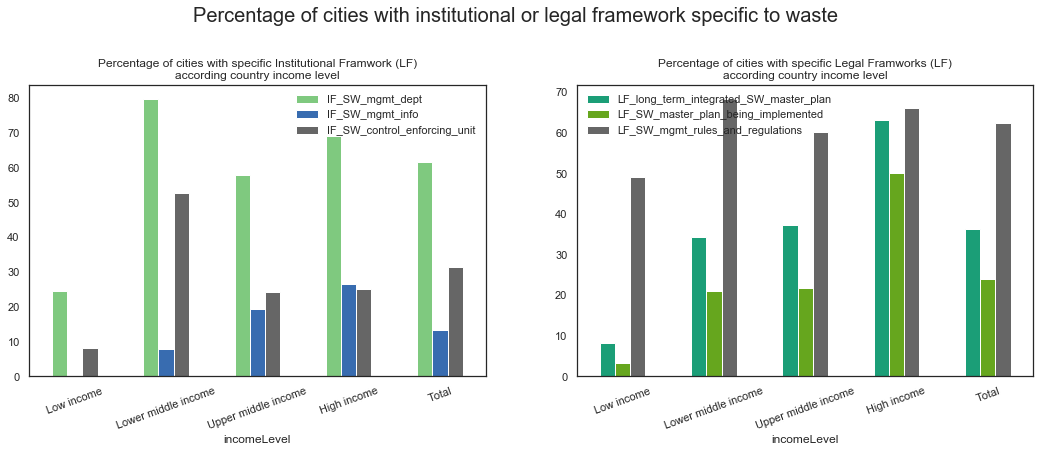

In [81]:
fig, axes = plt.subplots(ncols=2)

fig.suptitle('Percentage of cities with institutional or legal framework specific to waste', fontsize=20)
fig.subplots_adjust(top=0.80)
percent_binary_variables_Cities_income[IF_variables].plot(kind='bar',rot=20,figsize=(18,6),title='Percentage of cities with specific Institutional Framwork (LF)\naccording country income level',colormap='Accent',ax=axes[0])
percent_binary_variables_Cities_income[LF_variables].plot(kind='bar',rot=20,figsize=(18,6),title='Percentage of cities with specific Legal Framworks (LF)\naccording country income level',colormap='Dark2',ax=axes[1])


plt.savefig('Perc_Cities_IForLF.png', bbox_inches='tight')

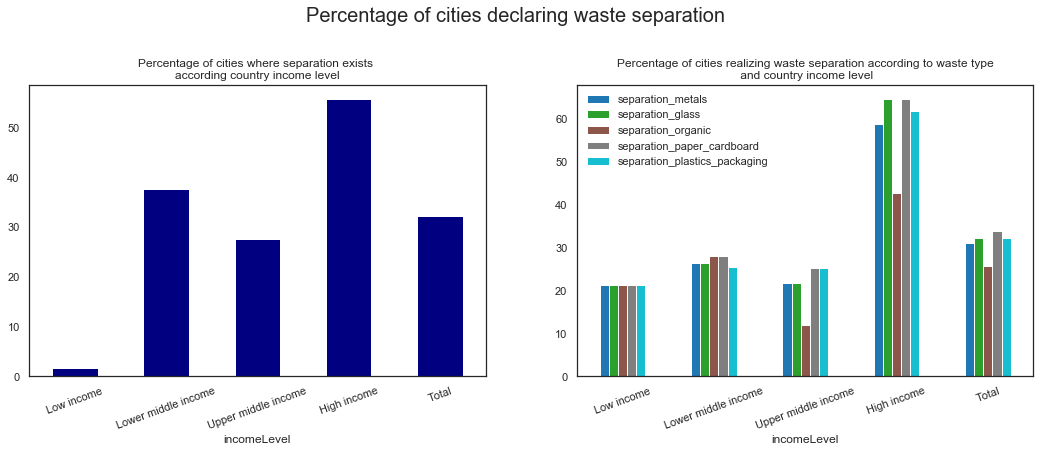

In [82]:
fig, axes = plt.subplots(ncols=2)
fig.suptitle('Percentage of cities declaring waste separation', fontsize=20)
fig.subplots_adjust(top=0.80)
percent_binary_variables_Cities_income['separation_existence'].plot(kind='bar',rot=20,figsize=(18,6),title='Percentage of cities where separation exists \naccording country income level',colormap='jet',ax=axes[0])
percent_binary_variables_Cities_income[Separation_detail_var].plot(kind='bar',rot=20,figsize=(18,6),title='Percentage of cities realizing waste separation according to waste type\n and country income level',colormap='tab10',ax=axes[1])


plt.savefig('Perc_Cities_Separation.png', bbox_inches='tight')


## WORDCLOUDS

In [83]:
cities_by_countries = pd.concat([waste_cities_df[['city_name','country_code']].groupby('country_code').count(),waste_cities_df[['population','MSW_generated_tons_year','country_code']].groupby('country_code').sum(),waste_cities_df[binary_variables].groupby('country_code').sum(),round(waste_cities_df[['recycling_percent','country_code']].groupby('country_code').mean(),2), waste_cities_df.groupby('country_code')['primary_collection_form'].apply(list)],axis=1)
cities_by_countries = cities_by_countries.rename(columns={'city_name':'cities_number','population':'cities_population'})
cities_by_countries = cities_by_countries.sort_values(by=['cities_number'], ascending=False)
cities_by_countries['primary_collection_form']=cities_by_countries['primary_collection_form'].apply(', '.join)

In [84]:
cities_by_countries_geo.head()

country_code  cities_number  cities_population  MSW_generated_tons_year  \
125          AUS              1           353626.0                350000.00   
123          SVN              1           309261.0                 98410.00   
77           ITA              2          1429673.0                765300.44   
117          IRL              1           527612.0                142889.00   
124          CHE              1           358000.0                 59000.00   

     IF_SW_mgmt_dept  IF_SW_mgmt_info  IF_SW_control_enforcing_unit  \
125                1                1                             0   
123                1                0                             0   
77                 0                1                             0   
117                1                0                             1   
124                0                0                             0   

     LF_long_term_integrated_SW_master_plan  \
125                                       1   
123                                       1   
77                                        1   
117                                       1   
124                                       0   

     LF_SW_master_plan_being_implemented  LF_SW_mgmt_rules_and_regulations  \
125                                    1                                 1   
123                                    0                                 1   
77                                     1                                 2   
117                                    1                                 1   
124                                    0                                 0   

     ...  primary_collection_form  percent_cities_by_country  \
125  ...                 curbside                       0.31   
123  ...                    other                       0.31   
77   ...   multiple, door to door                       0.61   
117  ...                 multiple                       0.31   
124  ...             not_informed                       0.31   

     percent_population_dataset  cities_waste_generation_by_inhab  \
125                        0.06                          0.989746   
123                        0.06                          0.318210   
77                         0.25                          0.535298   
117                        0.09                          0.270822   
124                        0.06                          0.164804   

            name                 region  incomeLevel  longitude  latitude  \
125    Australia    East Asia & Pacific  High income  149.12900  -35.2820   
123     Slovenia  Europe & Central Asia  High income   14.50440   46.0546   
77         Italy  Europe & Central Asia  High income   12.48230   41.8955   
117      Ireland  Europe & Central Asia  High income   -6.26749   53.3441   
124  Switzerland  Europe & Central Asia  High income    7.44821   46.9480   

     NumIncome  
125          4  
123          4  
77           4  
117          4  
124          4  

[5 rows x 27 columns]

In [85]:
cities_by_countries_geo['incomeLevel'].unique()

array(['High income', 'Lower middle income', 'Upper middle income',
       'Low income'], dtype=object)

In [86]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [87]:
cities_by_countries_geo['primary_collection_form']

125                  curbside
123                     other
77     multiple, door to door
117                  multiple
124              not_informed
                ...          
17               door to door
148              door to door
147              door to door
138              door to door
149              not_informed
Name: primary_collection_form, Length: 150, dtype: object

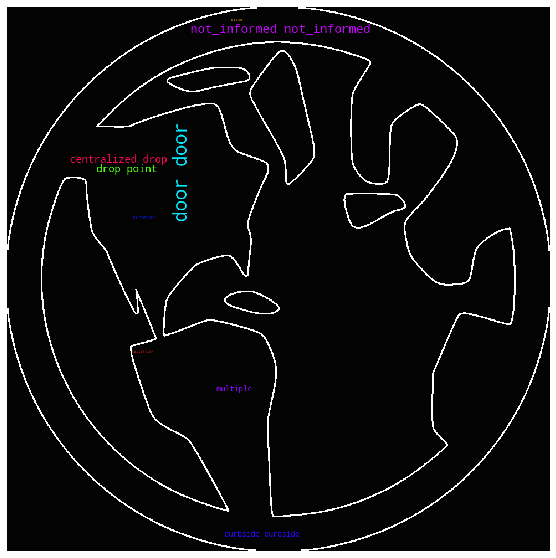

In [88]:
text = " ".join(i for i in cities_by_countries_geo['primary_collection_form'])
# Mask
world_mask = np.array(Image.open("imageWordCloud/world.png"))

# Create and generate a word cloud image:
wordcloud_total = WordCloud(max_words=1000, background_color="black", mask=world_mask, 
                            contour_width=3, contour_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
image_colors = ImageColorGenerator(world_mask)
plt.imshow(wordcloud_total.recolor( colormap= 'hsv' , random_state=17), alpha=4)
plt.axis("off")


# store to file
plt.savefig("CollectionTotalWC.png", format="png")


In [89]:
LI_text = " ".join(i for i in cities_by_countries_geo['primary_collection_form'].loc[cities_by_countries_geo['incomeLevel']=='Low income'])
LowIncome_mask = np.array(Image.open("imageWordCloud/income/LInc.png"))

wordcloud_lowincome = WordCloud(max_words=500, background_color="white", mask=LowIncome_mask,
                               contour_width=3, contour_color='black').generate(LI_text)


In [90]:
LMI_text = " ".join(i for i in cities_by_countries_geo['primary_collection_form'].loc[cities_by_countries_geo['incomeLevel']=='Lower middle income'])
LowMidIncome_mask = np.array(Image.open("imageWordCloud/income/LMI.png"))

wordcloud_lowMidIncome = WordCloud(max_words=500, background_color="white", mask=LowMidIncome_mask
                                  ,contour_width=1, contour_color='black').generate(LMI_text)

In [91]:
UMI_text = " ".join(i for i in cities_by_countries_geo['primary_collection_form'].loc[cities_by_countries_geo['incomeLevel']=='Upper middle income'])
UppMidIncome_mask = np.array(Image.open("imageWordCloud/income/middlehighincome.png"))
wordcloud_UppMidIncome = WordCloud(max_words=500, background_color="white", mask=UppMidIncome_mask,
                                   contour_width=3, contour_color='black').generate(UMI_text)

In [92]:
HI_text = " ".join(i for i in cities_by_countries_geo['primary_collection_form'].loc[cities_by_countries_geo['incomeLevel']=='High income'])

HighIncome_mask = np.array(Image.open("imageWordCloud/income/HighInc.png"))
wordcloud_HighIncome = WordCloud(max_words=500, background_color="white", mask=HighIncome_mask,
                                   contour_width=3, contour_color='grey').generate(HI_text)


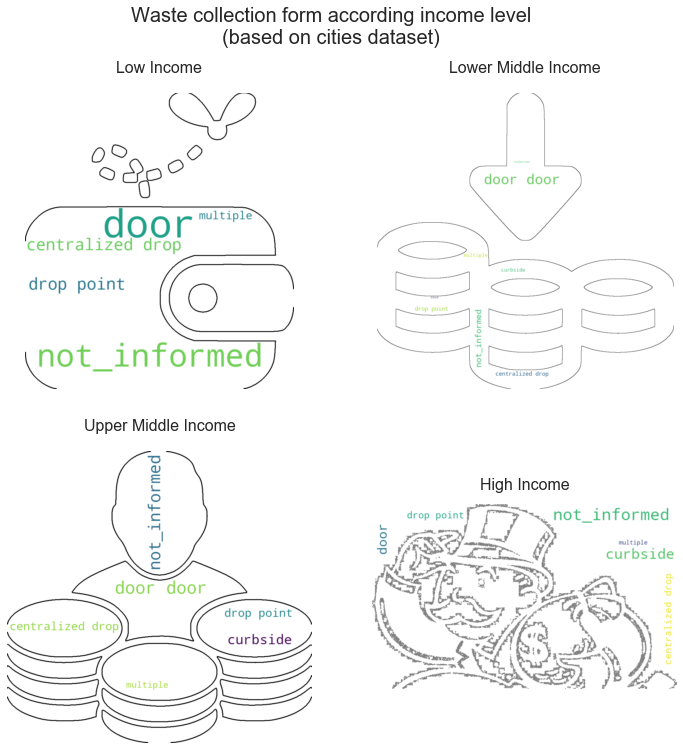

In [93]:
plt.figure(figsize=[12,12])


plt.subplot(2, 2, 1).set_title("Low Income", y=1.05, fontsize=16)
plt.plot()
plt.imshow(wordcloud_lowincome, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

plt.subplot(2, 2, 2).set_title("Lower Middle Income", y=1.05, fontsize=16)
plt.plot()
plt.imshow(wordcloud_lowMidIncome, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

plt.subplot(2, 2, 3).set_title("Upper Middle Income",y=1.05,  fontsize=16)
plt.plot()
plt.imshow(wordcloud_UppMidIncome, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

plt.subplot(2, 2, 4).set_title("High Income",y=1.05,  fontsize=16)
plt.plot()
plt.imshow(wordcloud_HighIncome, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

plt.suptitle('Waste collection form according income level\n(based on cities dataset)', fontsize=20)

plt.savefig('WasteCollecIncomeLevel.png', bbox_inches='tight')